# <center> Prediccion de Precios en Bienes Raices - Mercado Australiano - Regresion Avanzada

### Integrates de Grupo:

* Wilder Serdan (wserdan@gmail.com)
* Oscar Ramirez (oscar.ramirez.guachalla@gmail.com)
* Ruth Daniela Villalobos (ruthdanivillalobos@gmail.com)

# Tabla de Contenido

1. [Introduccion](#1-introducción)
    * [Objetivos del negocio](#11-objetivo-del-negocio)
2. [Configuracion e Instalacion](#2-configuracion-e-instalacion)
    * [Instalaciones Necesarias](#instalaciones-necesarias)
    * [Librerías Generales](#librerías-generales)
    * [Librerías Machine Learning](#librerias-machine-learning)
    * [Librerías Estadística](#librerias-estadística)
    * [Alertas](#alertas)
    * [Definición de Números de Decimales](#definición-de-número-de-decimales)
3. [Entendimiento de los Datos](#3-entendimiento-de-los-datos)  
4. [Manipulacion y Limpieza de Datos](#4-manipulación-y-limpieza-de-datos)
    * [Cargado y Visualización de Datos](#cargado-y-visualización-de-datos)
    * [Evaluación Inicial](#evaluación-inicial)
	    * [Campos Categóricos](#campos-categóricos)
	    * [Correlación](#correlación)
	    * [Correñación entre variables categóricas y numericas](#correlación-entre-variables-categóricas-y-numéricas)
	    * [Datos Faltantes](#datos-faltantes)
	    * [Completado de Valores Nulos](#completado-de-valores-nulos)
	    * [Verificación de Valores Nulos](#verificación-de-valores-nulos)
    * [Normalidad](#normalidad)
    * [Droping Data](#droping-data)
	    * [Eliminación de Variables Codependientes](#eliminación-de-variables-codependientes)
	    * [Eliminación de variblaes por Multicolinealidad](#eliminación-de-variables-por-multicolinealidad)
	    * [Creación de Variable "TipoVecindario"](#creación-de-variable-tipovecindario)
    * [Outliers](#outliers)
        * [Outliers GrLivArea](#outliers-grlivarea)
	    * [Outliers PoolArea](#outliers-poolarea)
	    * [Outliers MiscVal](#outliers-miscval)
	    * [Outliers LotArea](#outliers-lotarea)
	    * [Outliers MasVnrArea](#outliers-masvnrarea)
    * [Derived Data](#derived-data)
	    * [Variables Dummy](#variables-dummy)
5. [Analisis de Datos](#5-análisis-de-datos)
6. [Preparacion de Datos y Modelado](#6-preparación-de-datos)
7. [Construccion-del-Modelo](#7-construcción-del-modelo)
8. [Conclusions y Observaciones](#8-conclusiones-y-observaciones)

# 1. Introducción 

Una empresa de vivienda con sede en EE. UU. llamada Surprise Housing ha decidido ingresar al mercado australiano. La empresa utiliza el análisis de datos para comprar casas a un precio inferior a sus valores reales y venderlas a un precio más alto. Con el mismo propósito, la empresa ha recopilado un conjunto de datos de la venta de casas en Australia. Los datos se proporcionan en el archivo CSV a continuación.

La compañía está buscando posibles propiedades para comprar e ingresar al mercado. Debe construir un modelo de regresión utilizando la regularización para predecir el valor real de las posibles propiedades y decidir si invertir en ellas o no.

La empresa quiere saber:

* Qué variables son significativas para predecir el precio de una casa, y
* Qué tan bien esas variables describen el precio de una casa.

Además, determine el valor óptimo de lambda para la regresión de Ridge y Lasso.
 
### Objetivo del Negocio:

Debe modelar el precio de las casas con las variables independientes disponibles. Luego, la gerencia utilizará este modelo para comprender cómo varían exactamente los precios con las variables. En consecuencia, pueden manipular la estrategia de la empresa y concentrarse en áreas que generarán altos rendimientos. Además, el modelo será una buena manera para que la gerencia entienda la dinámica de precios de un nuevo mercado.

# 2. Configuración e Instalación

### Instalaciones Necesarias

In [195]:
!pip install impyute

### Librerías Generales

In [196]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pylab 
import seaborn as sns
import sys
from impyute.imputation.cs import mice

### Librerias Machine Learning

In [197]:
import sklearn
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import r2_score, mean_squared_error,make_scorer
from sklearn.model_selection import train_test_split, GridSearchCV, KFold,cross_val_score
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder,OrdinalEncoder
from sklearn import metrics

### Librerias Estadística

In [198]:
import statsmodels.api as stats
from statsmodels.api import OLS
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.stats.stattools import durbin_watson
from scipy.stats import shapiro, kstest, norm,f_oneway
from scipy import stats

from sklearn.ensemble import RandomForestRegressor
from sklearn.inspection import permutation_importance

### Alertas

In [199]:
import warnings
warnings.filterwarnings('ignore')

### Definición de Número de Decimales

In [200]:
pd.options.display.float_format = '{:.2f}'.format 

# 3. Entendimiento de los Datos

| N° | Nombre Dato | Significado|   
|---|---|---|
| 1 | Id | Identificador de posición |
| 2 | MSSubClass | Identifica el tipo de vivienda objeto de la venta. |
| 3 | MSZoning | Identifica la clasificación de zonificación general de la venta. |
| 4 | LotFrontage | Pies lineales de calle conectados a la propiedad | 
| 5 | LotArea | Tamaño del lote en pies cuadrados | 
| 6 | Street | Tipo de vía de acceso a la propiedad | 
| 7 | Alley | Tipo de callejón de acceso a la propiedad | 
| 8 | LotShape | Forma general de la propiedad. | 
| 9 | LandContour | Llanura de la propiedad | 
| 10 | Utilities | Tipo de utilidades disponibles | 
| 11 | LotConfig | Configuración de lotes | 
| 12 | LandSlope | Pendiente de la propiedad | 
| 13 | Neighborhood | Ubicaciones físicas dentro de los límites de la ciudad de Ames | 
| 14 | Condition1 | Proximidad a varias condiciones | 
| 15 | Contition2 | Proximidad a varias condiciones (si hay más de una presente) | 
| 16 | BldgType | Tipo de vivienda | 
| 17 | HouseStyle | Estilo de vivienda | 
| 18 | OverallQual | Califica el material general y el acabado de la casa | 
| 19 | OveralCond | Califica el estado general de la casa |
| 20 | YearBuilt | Fecha de construcción original | 
| 21 | YearRemodAdd | Fecha de remodelación (igual que la fecha de construcción si no hay remodelaciones ni adiciones) | 
| 22 | RoofStyle | Tipo de techo | 
| 23 | RoofMatl | Material del techo | 
| 24 | Exterior1st | Revestimiento exterior de la casa | 
| 25 | Exterior2nd | Revestimiento exterior de la casa (si hay más de un material) | 
| 26 | MasVnrType | Tipo de chapa de mampostería | 
| 27 | MasVnrArea | Fábrica de albañilería | 
| 28 | ExterQual | Evalúa la calidad del material en el exterior | 
| 29 | ExterCond | Evalúa el estado actual del material en el exterior | 
| 30 | Foundation | Tipo de cimentación | 
| 31 | BsmtQual | Evalúa la altura del sótano | 
| 32 | BsmtCond | Evalúa el estado general del sótano | 
| 33 | BsmtExposure | Se refiere a las paredes a nivel del jardín o de la huelga | 
| 34 | BsmtFinType1 | Clasificación del área terminada del sótano | 
| 35 | BsmtFinSF1 | Tipo 1 pies cuadrados terminados | 
| 36 | BsmtFinType2 | Clasificación del área terminada del sótano (si hay varios tipos) | 
| 37 | BsmtFinSF2 | Tipo 2 pies cuadrados terminados | 
| 38 | BsmtUnfSF | pies cuadrados sin terminar del área del sótano | 
| 39 | TotalBsmtSF | pies cuadrados totales del área del sótano | 
| 40 | Heating | Tipo de calefacción | 
| 41 | HeatingQC | Calidad y condición de la calefacción | 
| 42 | CentralAir | Aire acondicionado central | 
| 43 | Electrical | Sistema eléctrico | 
| 44 | 1stFlrSF | Pies cuadrados del primer piso | 
| 45 | 2ndFlrSF | Pies cuadrados del segundo piso | 
| 46 | LowQualFinSF | Pies cuadrados terminados de baja calidad (todos los pisos) | 
| 47 | GrLivArea | Pies cuadrados de superficie habitable sobre el nivel del suelo (suelo) | 
| 48 | BsmtFullBath | Baños completos del sótano | 
| 49 | BsmtHalfBath | Medios baños del sótano | 
| 50 | FullBath | Baños completos sobre rasante | 
| 51 | HalfBath | Medios baños sobre el nivel del suelo | 
| 52 | BedroomAbvGr | Dormitorios sobre el nivel del suelo (NO incluye dormitorios en el sótano) | 
| 53 | KitchenAbvGr | Cocinas sobre rasante | 
| 54 | KitchenQual | Calidad de la cocina | 
| 55 | TotRmsAbvGrd | Total de habitaciones sobre rasante (no incluye baños) | 
| 56 | Functional | Funcionalidad del hogar (suponga que es típico a menos que se justifiquen las deducciones) | 
| 57 | Fireplaces | Número de chimeneas | 
| 58 | FireplaceQu | Calidad de chimenea | 
| 59 | GarageType | Ubicación del garaje | 
| 60 | GarageYrBlt | Año en que se construyó el garaje | 
| 61 | GarageFinish | Acabado interior del garaje | 
| 62 | GarageCars | Tamaño del garaje en capacidad de automóviles | 
| 63 | GarageArea | Tamaño del garaje en pies cuadrados | 
| 64 | GarageQual | Calidad de garaje | 
| 65 | GarageCond | Estado del garaje | 
| 66 | PavedDrive | Entrada pavimentada | 
| 67 | WoodDeckSF | Area de la cubierta de madera en pies cuadrados | 
| 68 | OpenPorchSF | Area de porche abierto en pies cuadrados | 
| 69 | EnclosedPorch | Area de porche cerrado en pies cuadrados | 
| 70 | 3SsnPorch | Área de porche de tres estaciones en pies cuadrados | 
| 71 | ScreenPorch | Área de porche de pantalla en pies cuadrados | 
| 72 | PoolArea | Área de la piscina en pies cuadrados | 
| 73 | PoolQC | Calidad de la piscina | 
| 74 | Fence | Calidad de la cerca | 
| 75 | MiscFeature | Característica miscelánea no incluida en otras categorías | 
| 76 | MiscVal | Valor de la característica miscelánea | 
| 77 | MoSold | Mes vendido (MM) | 
| 78 | YrSold | Año de venta (AAAA) | 
| 79 | SaleType | Tipo de venta | 
| 80 | SaleCondition | Condición de venta | 
| 81 | SalePrice | Precio de la venta | 


# 4. Manipulación y Limpieza de datos

### Cargado y Visualización de Datos 

In [201]:
data=pd.read_csv("_data/dataset.csv")
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [202]:
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.00,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.00,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.00,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.00,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.00,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [203]:
data.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [204]:
data.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.00,1460.00,1201.00,1460.00,1460.00,1460.00,1460.00,1460.00,1452.00,1460.00,...,1460.00,1460.00,1460.00,1460.00,1460.00,1460.00,1460.00,1460.00,1460.00,1460.00
mean,730.50,56.90,70.05,10516.83,6.10,5.58,1971.27,1984.87,103.69,443.64,...,94.24,46.66,21.95,3.41,15.06,2.76,43.49,6.32,2007.82,180921.20
std,421.61,42.30,24.28,9981.26,1.38,1.11,30.20,20.65,181.07,456.10,...,125.34,66.26,61.12,29.32,55.76,40.18,496.12,2.70,1.33,79442.50
min,1.00,20.00,21.00,1300.00,1.00,1.00,1872.00,1950.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,2006.00,34900.00
25%,365.75,20.00,59.00,7553.50,5.00,5.00,1954.00,1967.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,5.00,2007.00,129975.00
50%,730.50,50.00,69.00,9478.50,6.00,5.00,1973.00,1994.00,0.00,383.50,...,0.00,25.00,0.00,0.00,0.00,0.00,0.00,6.00,2008.00,163000.00
75%,1095.25,70.00,80.00,11601.50,7.00,6.00,2000.00,2004.00,166.00,712.25,...,168.00,68.00,0.00,0.00,0.00,0.00,0.00,8.00,2009.00,214000.00
max,1460.00,190.00,313.00,215245.00,10.00,9.00,2010.00,2010.00,1600.00,5644.00,...,857.00,547.00,552.00,508.00,480.00,738.00,15500.00,12.00,2010.00,755000.00


### Evaluación Inicial

#### Datos Categoricos y Numericos

In [205]:
numeric_cols = data.select_dtypes(include=['float64', 'int64']).columns
categorical_cols = data.select_dtypes(include=['object']).columns

# Imprimir las columnas
print("Numeric columns: ", numeric_cols)
print("Categorical columns: ", categorical_cols)

Numeric columns:  Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')
Categorical columns:  Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinTyp

#### Campos Categóricos

In [206]:
num_to_cat=['MSSubClass']#, 'OverallQual', 'OverallCond']#, 'YearBuilt', 'YearRemodAdd','GarageYrBlt', 'MoSold', 'YrSold']
data_recat= data.copy()
data_recat[num_to_cat] = data_recat[num_to_cat].astype(str)
data_recat.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   object 
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

#### Correlación


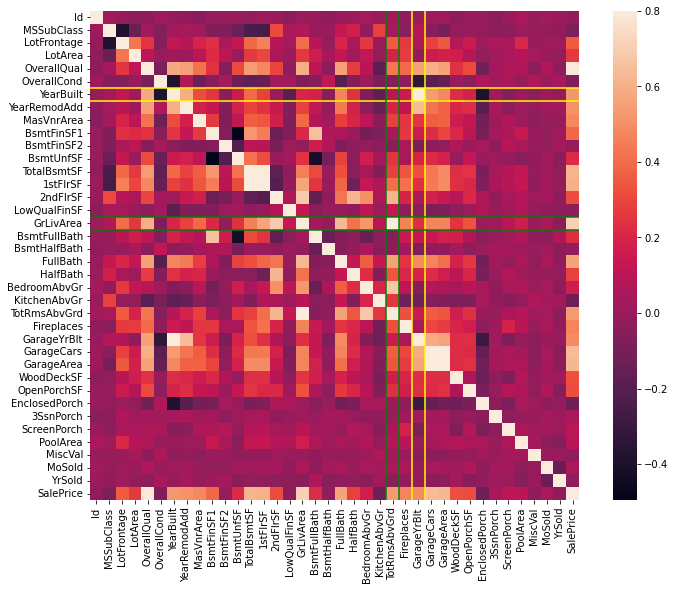

In [207]:
corrmat = data.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True)#, annot=True,fmt=".1f");
#YearBulit y GarageYrBlt
ax.hlines([6,7], colors="yellow",*ax.get_xlim())
ax.vlines([25,26], colors="yellow",*ax.get_ylim())

#TotalRooms
ax.hlines([16,17], colors="green",*ax.get_xlim())
ax.vlines([23,24], colors="green",*ax.get_ylim())

#### Correlación entre Variables Categóricas y Numéricas

In [208]:
def corrNumCat(d,c,n):
  encoder=LabelEncoder()
  encoder.fit(d[c])
  new=c + "_enc"
  d[new]=encoder.transform(d[c])
  corr=d[n].corr(d[new])
  #Esto podemos obviar si vamos a necesitar
  d.drop([new],axis=1, inplace=True)
  print("correlación entre ",c ," y ",n, " es: ",corr)
def corrCatCat(d,c1,c2):
  encoder1=LabelEncoder()
  encoder2=LabelEncoder()
  encoder1.fit(d[c1])
  encoder2.fit(d[c2])
  new1=c1 + "_enc"
  new2=c2 + "_enc"
  d[new1]=encoder1.transform(d[c1])
  d[new2]=encoder2.transform(d[c2])
  corr=d[new1].corr(d[new2])
  #Esto podemos obviar si vamos a necesitar
  d.drop([new1],axis=1, inplace=True)
  d.drop([new2],axis=1, inplace=True)
  print("correlación entre ",c1 ," y ",c2, " es: ",corr)

def CorrNumNum(d,n1,n2):
  x= d[n1]
  y= d[n2]
  corr=x.corr(y)
  print("correlación entre ",n1 ," y ",n2, " es: ",corr)

In [209]:
corrNumCat(data,"PoolQC","PoolArea")
corrCatCat(data,"GarageCond","GarageQual") # Ver esto
corrNumCat(data,"GarageCars","GarageArea")
corrNumCat(data,"FireplaceQu","Fireplaces")
corrCatCat(data_recat,"GarageCond","GarageQual") # Ver esto

correlación entre  PoolQC  y  PoolArea  es:  -0.8842503024390972
correlación entre  GarageCond  y  GarageQual  es:  0.5970304958136524
correlación entre  GarageCars  y  GarageArea  es:  0.8824754142814629
correlación entre  FireplaceQu  y  Fireplaces  es:  -0.7282891760748211
correlación entre  GarageCond  y  GarageQual  es:  0.5970304958136524


#### Datos Faltantes o Nulos

In [210]:
nulos= pd.DataFrame(data.isnull().sum())
nulos= nulos[nulos[0]!=0]
nulos= nulos.sort_values(ascending=False,by=0)
#print("nulos",nulos.isnull().any())
print(nulos[nulos[0]!=0])
#print(x.to_markdown())
#ratio=(nulos/len(data.index)*100)
#print(ratio[ratio[0]!=0])

                 0
PoolQC        1453
MiscFeature   1406
Alley         1369
Fence         1179
FireplaceQu    690
LotFrontage    259
GarageType      81
GarageYrBlt     81
GarageFinish    81
GarageQual      81
GarageCond      81
BsmtExposure    38
BsmtFinType2    38
BsmtFinType1    37
BsmtCond        37
BsmtQual        37
MasVnrArea       8
MasVnrType       8
Electrical       1


#### Completado de Valores Nulos

In [211]:
def datosFaltantes(d,campo,x):
  d[campo]=d[campo].fillna(x)

In [212]:
camposMissData=["PoolQC","Alley","Fence","FireplaceQu","GarageType","GarageFinish",
                "GarageQual","GarageCond","BsmtExposure","BsmtFinType2","BsmtCond","BsmtFinType1",
                "BsmtQual","MasVnrType","MiscFeature"]

for campo in camposMissData:
  datosFaltantes(data_recat,campo,"No")  

# Campos especiales
datosFaltantes(data_recat,"MasVnrArea",0) 
datosFaltantes(data_recat,"GarageYrBlt",0)  # ver esto
datosFaltantes(data_recat,"Electrical","SBrkr") 

In [140]:
# "LotFrontage",
dataLot=data_recat[["LotFrontage","LotArea"]].copy()
#dataLot#=dataLot.reset_index()
imputados = pd.DataFrame(mice(dataLot.values))
imputados
data_recat["LotFrontage"]= imputados[0]

In [213]:
data_recat["LotFrontage"].isnull().any()

True

#### Verificación de Valores Nulos

In [214]:
nulos= pd.DataFrame(data_recat.isnull().sum())
nulos= nulos[nulos[0]!=0]

nulos= nulos.sort_values(ascending=False,by=0)
#print(nulos.sort_values(ascending=True, by=nulos[1]))
print(nulos[nulos[0]!=0])
#print(x.to_markdown())
ratio=(nulos/len(data_recat.index)*100)
print(ratio[ratio[0]!=0])

               0
LotFrontage  259
                0
LotFrontage 17.74


In [215]:
data_recat.isnull().sum().any()

True

### Normalidad

#### Medición de Normalidad en la variable SalesPrice

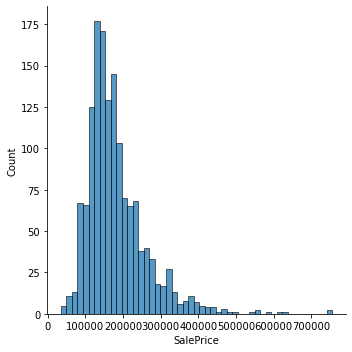

In [216]:
sns.displot(data['SalePrice'])

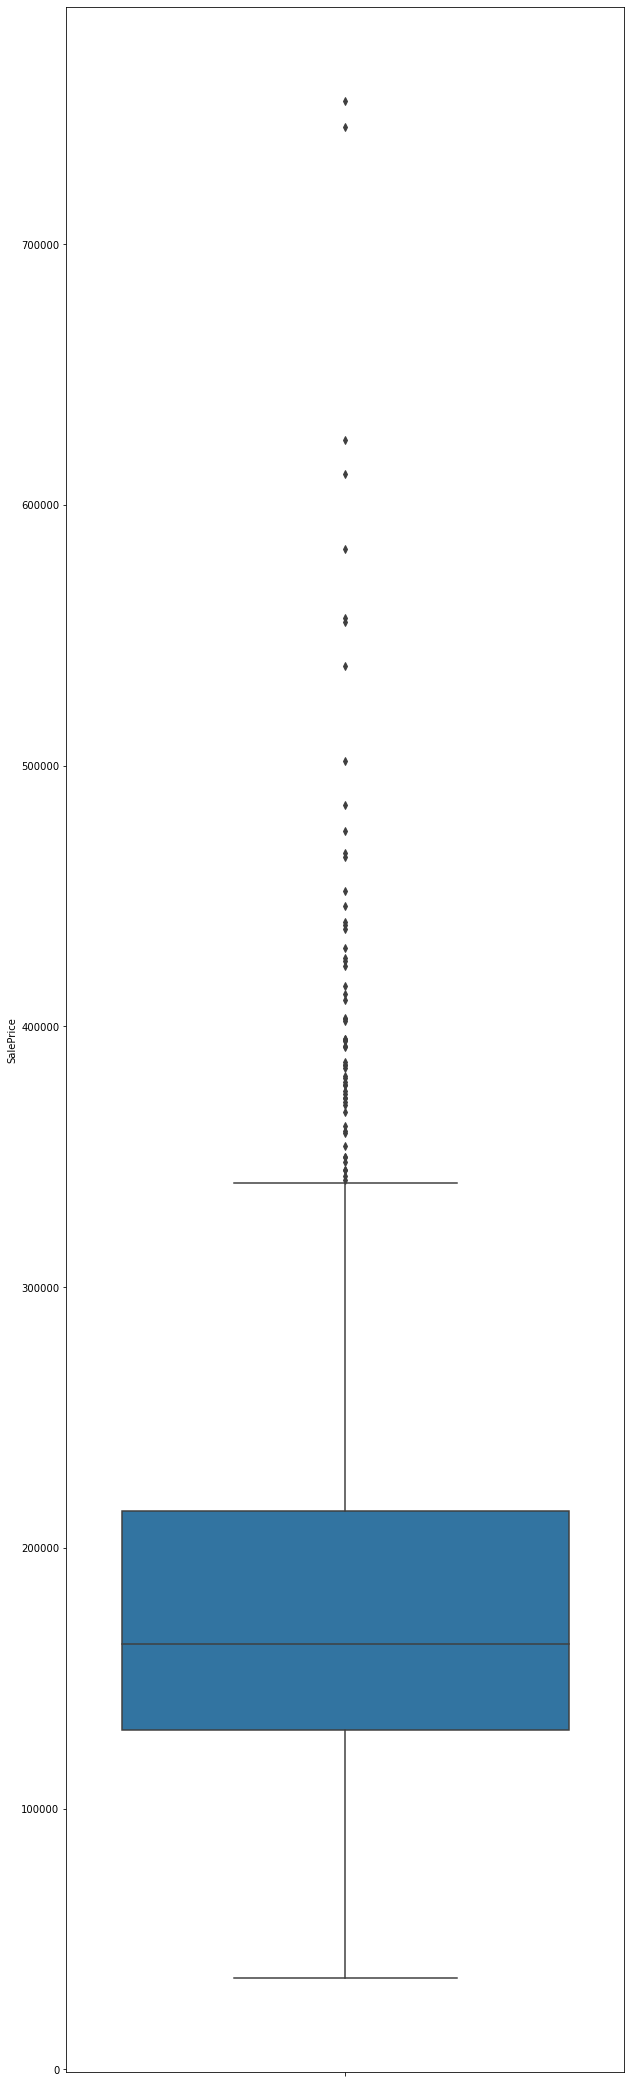

In [217]:
sns.boxplot(y = data["SalePrice"])
plt.show()

In [218]:
print("Asimetría: %f" % data['SalePrice'].skew())
print("Kurtosis: %f" % data['SalePrice'].kurt())
shapiro(data['SalePrice'])

Asimetría: 1.882876
Kurtosis: 6.536282


ShapiroResult(statistic=0.869671642780304, pvalue=3.206247534576162e-33)

* **Resultado**

    Los resultados indican que con una Asimetría de 1.8 la curva normal tiende a estar mayormente inclinada a la izquierda, lo cual se puede verificar en el histograma anterior. Y como la Kurtosis es mayor a 3 tenemos más de un valor extremo en la imagne, por lo que será necesario el tratamiento de los datos para un mejor entendimiento.

#### Logaritmizamos el resultado anterior

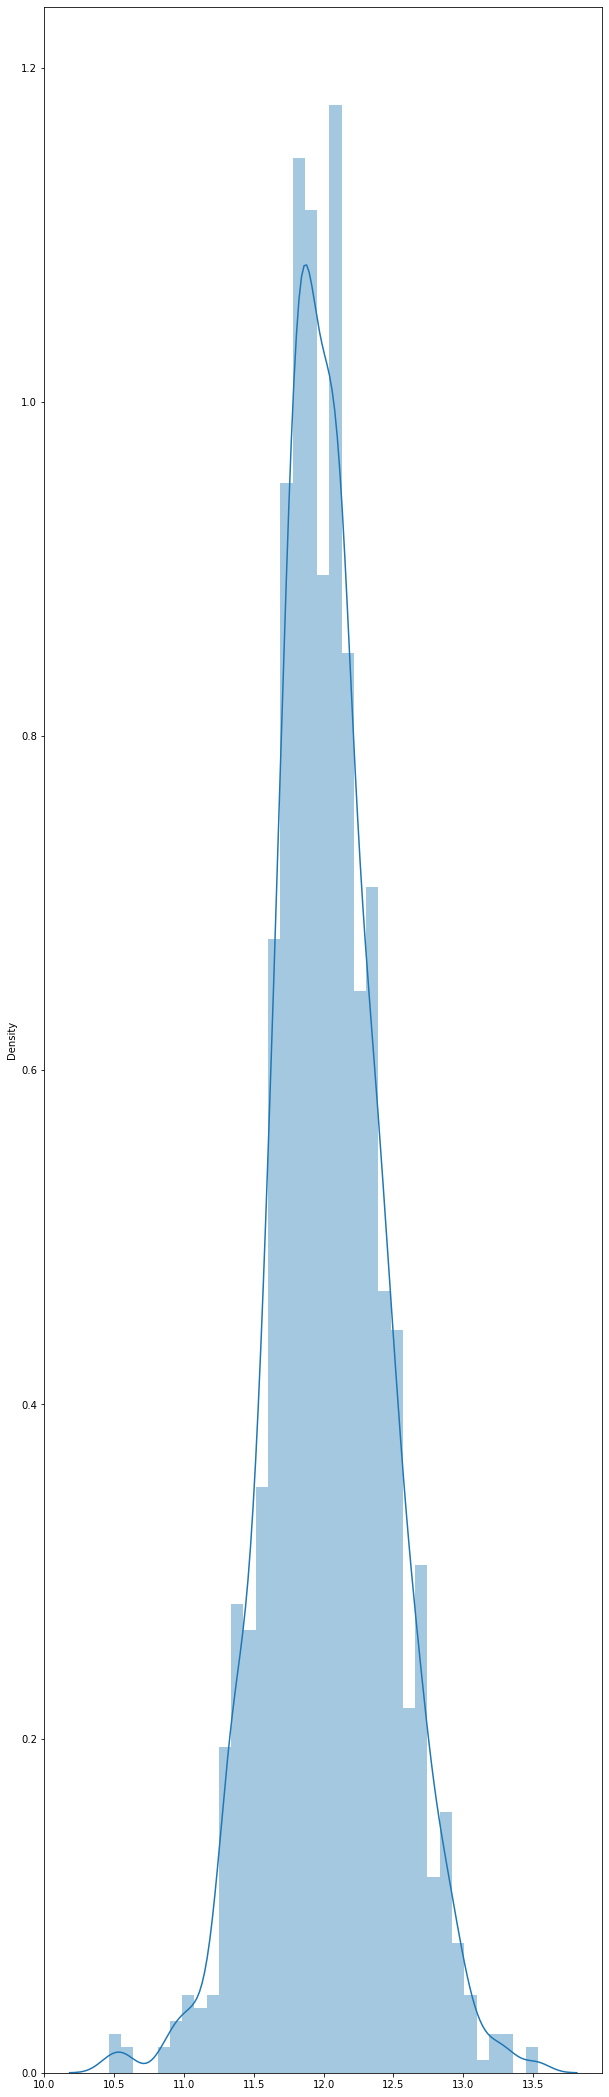

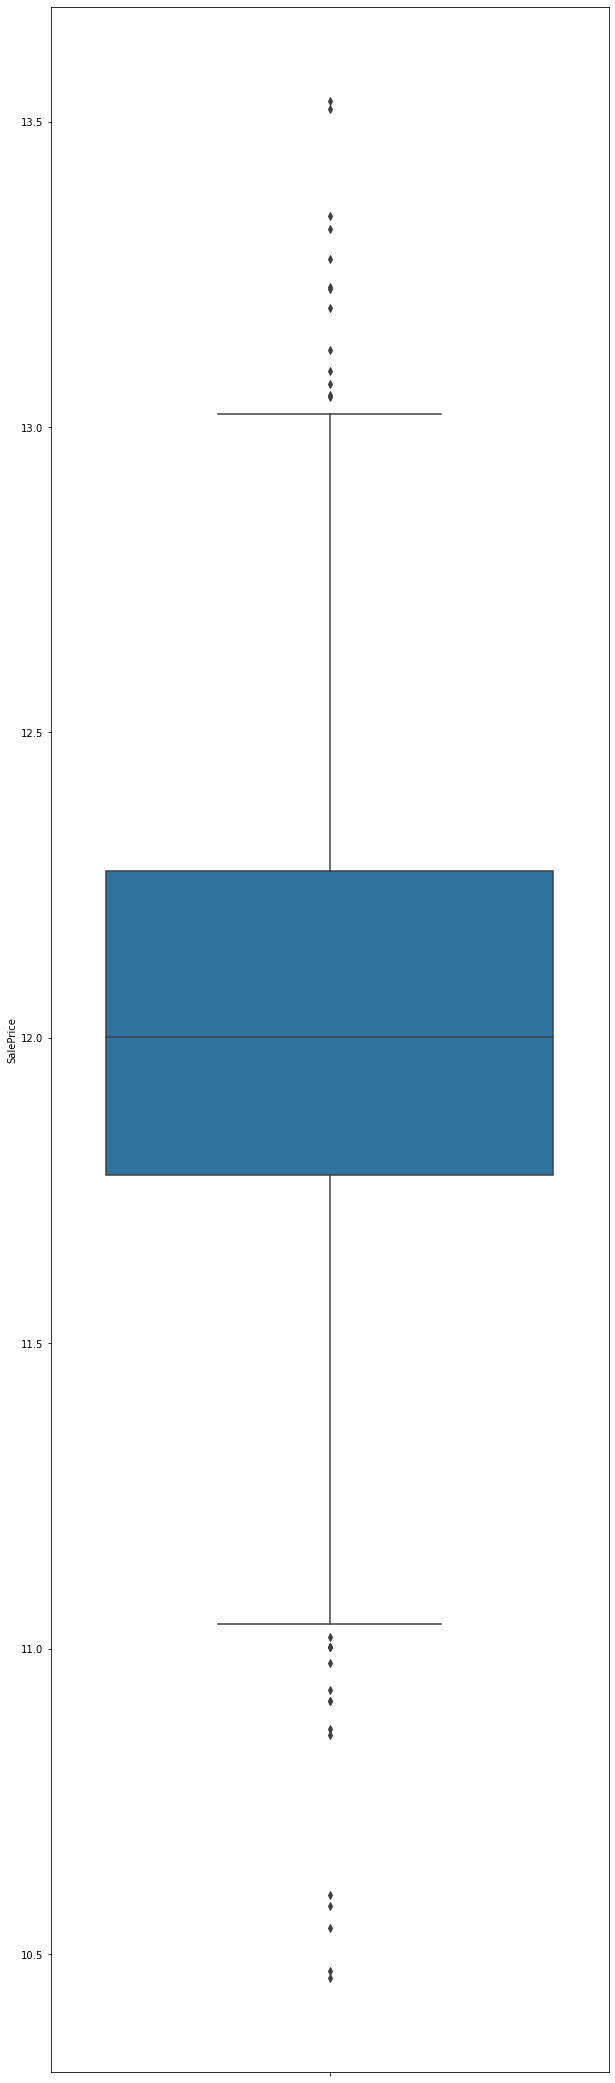

In [219]:
sns.distplot(x = np.log(data["SalePrice"]))
plt.show()
sns.boxplot(y = np.log(data["SalePrice"]))
plt.show()

In [148]:
data['SalePrice'] = np.log(data['SalePrice']) 

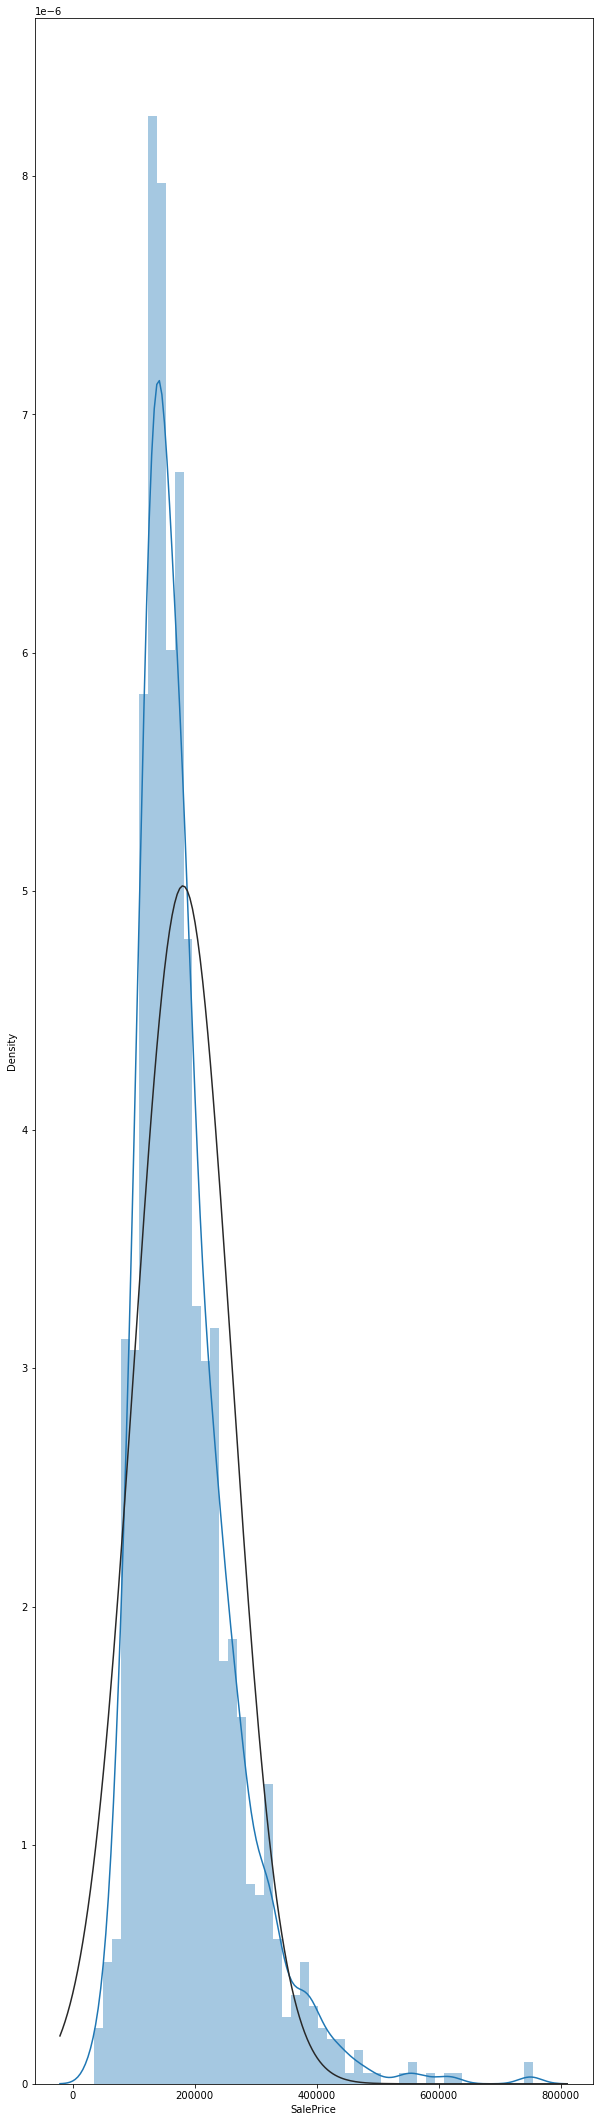

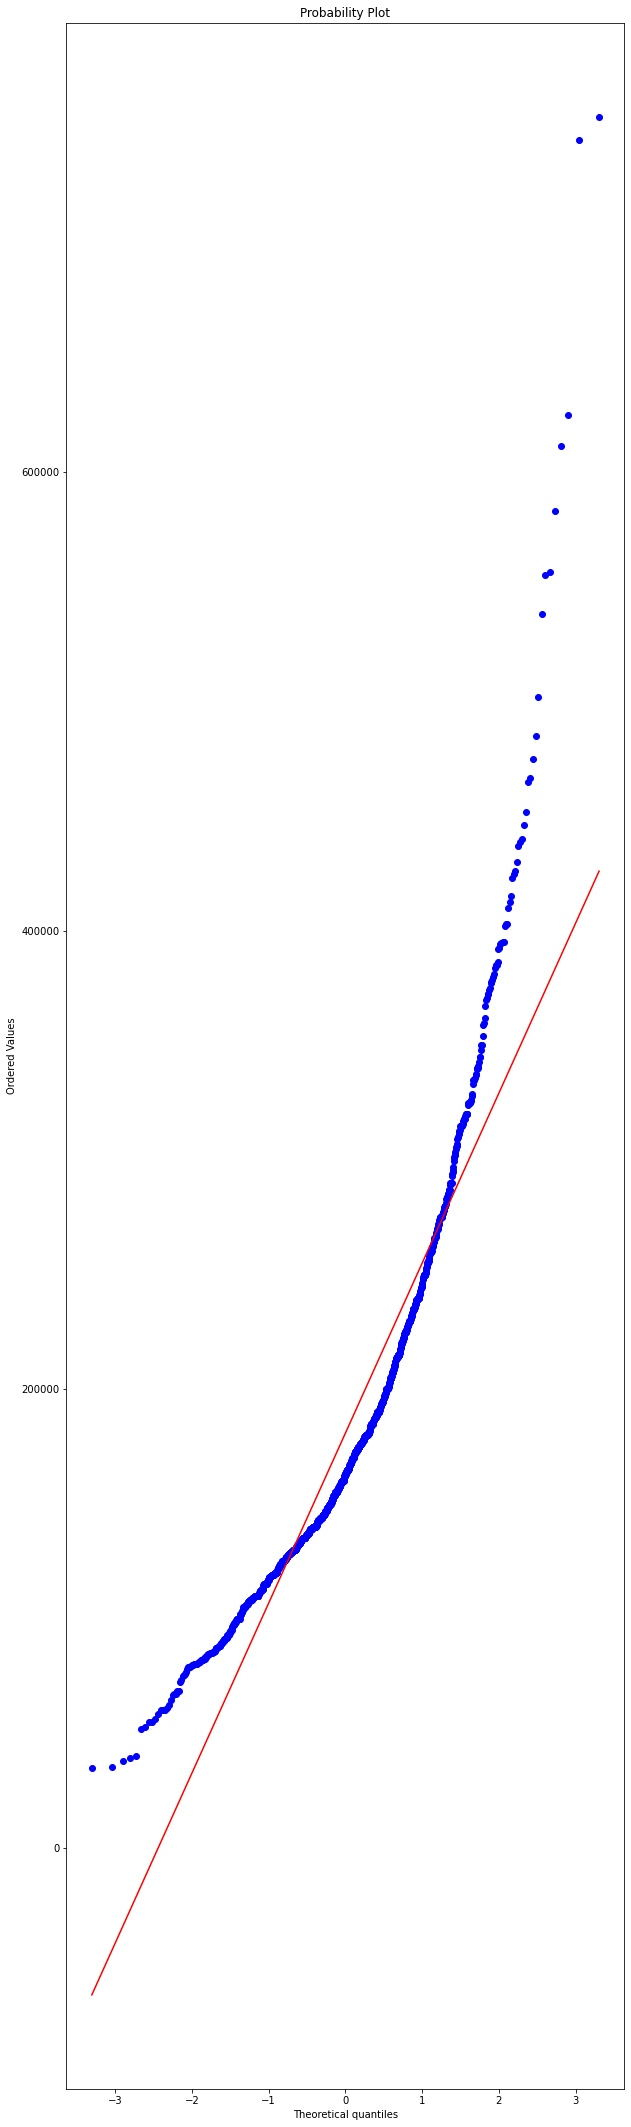

In [220]:
sns.distplot(data['SalePrice'], fit=norm);
fig = plt.figure()
res = stats.probplot(data['SalePrice'], plot=plt)

- **Resultado** 

    Como los datos se ajustan muy bien a la línea podemos decir que la variable "SalePrice" puede ser estudiada bajo una curva normal.

### Droping Data

#### Eliminación de Variables Codependientes

In [221]:
data_recat.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [222]:
data_recat["TotalSF"]=data_recat["GrLivArea"]+data_recat["TotalBsmtSF"]
# GrLivArea ='1stFlrSF'+'2ndFlrSF'+'LowQualFinSF'   Por lo tanto podemos desechar sus componentes
# TotalBsmtSF =  'BsmtFinSF1' +'BsmtFinSF2'+ 'BsmtUnfSF  Por lo tanto podemos desechar sus componentes

data_recat["TotalBathrooms"]=data_recat["FullBath"]+(data_recat["HalfBath"]/2)+data_recat["BsmtFullBath"]+(data_recat["BsmtHalfBath"]/2)
data_recat["TotaPorchSF"]=data_recat["OpenPorchSF"]+data_recat["3SsnPorch"]+data_recat["EnclosedPorch"]+data_recat["ScreenPorch"]
data_recat["EdadCasa"]=2023-data_recat["YearBuilt"]
data_recat["EdadGarage"]=2023-data_recat["GarageYrBlt"]
data_recat["EdadVendido"]=2023-data_recat["YrSold"]
data_recat["EdadRemod"]=2023-data_recat["YearRemodAdd"]

In [225]:
columnas_a_borrar=["FullBath","HalfBath","BsmtFullBath","BsmtHalfBath",
                   "OpenPorchSF","3SsnPorch","EnclosedPorch","ScreenPorch",
                  '1stFlrSF','2ndFlrSF','LowQualFinSF','TotalBsmtSF',
                   'BsmtFinSF1','BsmtFinSF2','BsmtUnfSF',"YearBuilt","GarageYrBlt","YrSold","YearRemodAdd",
                   
                   ]
data_recat=data_recat.drop(columnas_a_borrar,axis=1)

KeyError: "['FullBath', 'HalfBath', 'BsmtFullBath', 'BsmtHalfBath', 'OpenPorchSF', '3SsnPorch', 'EnclosedPorch', 'ScreenPorch', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'TotalBsmtSF', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'YearBuilt', 'GarageYrBlt', 'YrSold', 'YearRemodAdd'] not found in axis"

#### Eliminación de Variables por Multicolinealidad

In [226]:
# Por su alta correlación se elimina
CorrNumNum(data,"GarageYrBlt","YearBuilt") # esto ya esta transformado, habria que quitar
# Borrar  "GarageYrBlt"
corrNumCat(data,"PoolQC","PoolArea")
# Borrar  "PoolQC"
corrCatCat(data,"GarageCond","GarageQual")
# Borrar  "GarageCond"
corrNumCat(data,"GarageCars","GarageArea")
# Borrar  "GarageArea"
corrNumCat(data,"FireplaceQu","Fireplaces")
# Borrar  "Fireplaces"
CorrNumNum(data,"TotRmsAbvGrd","GrLivArea")
# Borrar  "TotRmsAbvGrd"

correlación entre  GarageYrBlt  y  YearBuilt  es:  0.825667484174342
correlación entre  PoolQC  y  PoolArea  es:  -0.8842503024390972
correlación entre  GarageCond  y  GarageQual  es:  0.5970304958136524
correlación entre  GarageCars  y  GarageArea  es:  0.8824754142814629
correlación entre  FireplaceQu  y  Fireplaces  es:  -0.7282891760748211
correlación entre  TotRmsAbvGrd  y  GrLivArea  es:  0.8254893743088431


In [227]:
data_recat.drop(["PoolQC"],axis=1, inplace=True)
data_recat.drop(["GarageCond"],axis=1, inplace=True)
data_recat.drop(["GarageArea"],axis=1, inplace=True)
data_recat.drop(["Fireplaces"],axis=1, inplace=True)
data_recat.drop(["TotRmsAbvGrd"],axis=1, inplace=True)

In [230]:
data_recat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 64 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Id              1460 non-null   int64  
 1   MSSubClass      1460 non-null   object 
 2   MSZoning        1460 non-null   object 
 3   LotFrontage     1201 non-null   float64
 4   LotArea         1460 non-null   int64  
 5   Street          1460 non-null   object 
 6   Alley           1460 non-null   object 
 7   LotShape        1460 non-null   object 
 8   LandContour     1460 non-null   object 
 9   Utilities       1460 non-null   object 
 10  LotConfig       1460 non-null   object 
 11  LandSlope       1460 non-null   object 
 12  Neighborhood    1460 non-null   object 
 13  Condition1      1460 non-null   object 
 14  Condition2      1460 non-null   object 
 15  BldgType        1460 non-null   object 
 16  HouseStyle      1460 non-null   object 
 17  OverallQual     1460 non-null   i

#### Creación de Variable "TipoVecindario"

In [232]:
alto=["StoneBr","NridgHt","NoRidge"]
bajo=["MeadowV","IDOTRR","BrDale"]
medio=[alto,bajo]
condiciones=[
            (data_recat["Neighborhood"].isin(alto)),
            (data_recat["Neighborhood"].isin(bajo)),
            (~data_recat["Neighborhood"].isin(medio))
             ]
valores=[2,0,1]
data_recat["TipoVecindario"]=np.select(condiciones,valores)
data_recat.groupby(["TipoVecindario"])["Neighborhood"].count()

TipoVecindario
0      70
1    1247
2     143
Name: Neighborhood, dtype: int64

### Outliers

#### Outliers GrLivArea

* Gráfica

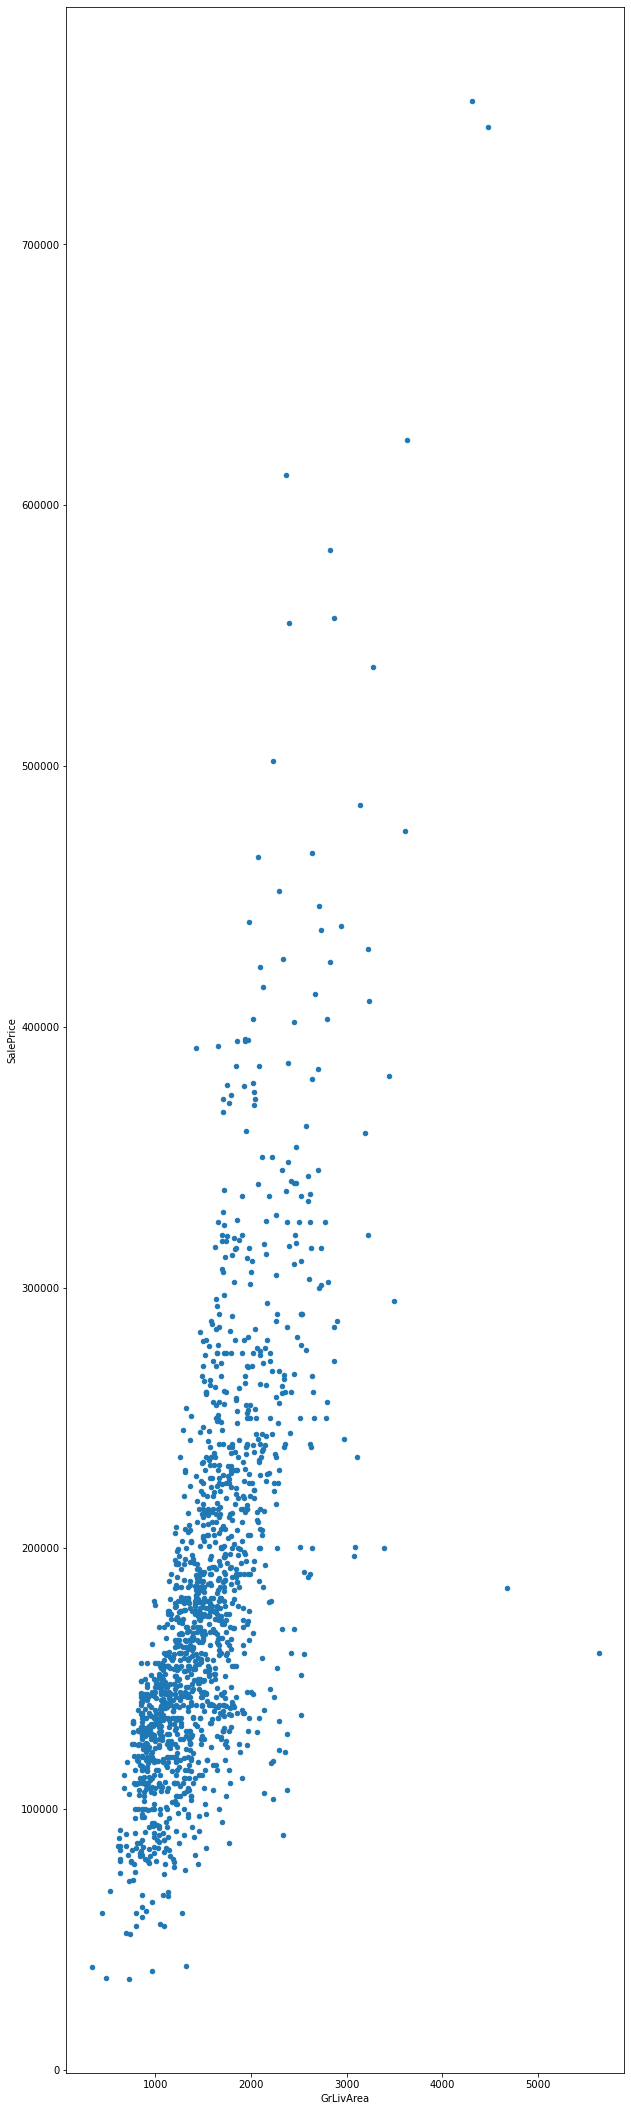

In [233]:
#scatter plot grlivarea/saleprice
def grafDisp(d,x,y):
  graf = pd.concat([d[y], d[x]], axis=1)
  graf.plot.scatter(x=x, y=y)
def borrarFilas(d,c,v):
  d.drop(d[d[c] >= v].index, inplace = True)

#scatter plot grlivarea/saleprice
grafDisp(data_recat,"GrLivArea","SalePrice")

* Borrado de Outliers

In [234]:
data_recat[data_recat["GrLivArea"]>4500][["GrLivArea","SalePrice"]]

,GrLivArea,SalePrice
523,4676,184750
1298,5642,160000


In [235]:
borrarFilas(data_recat,'GrLivArea',4500)

* Gráfica Final

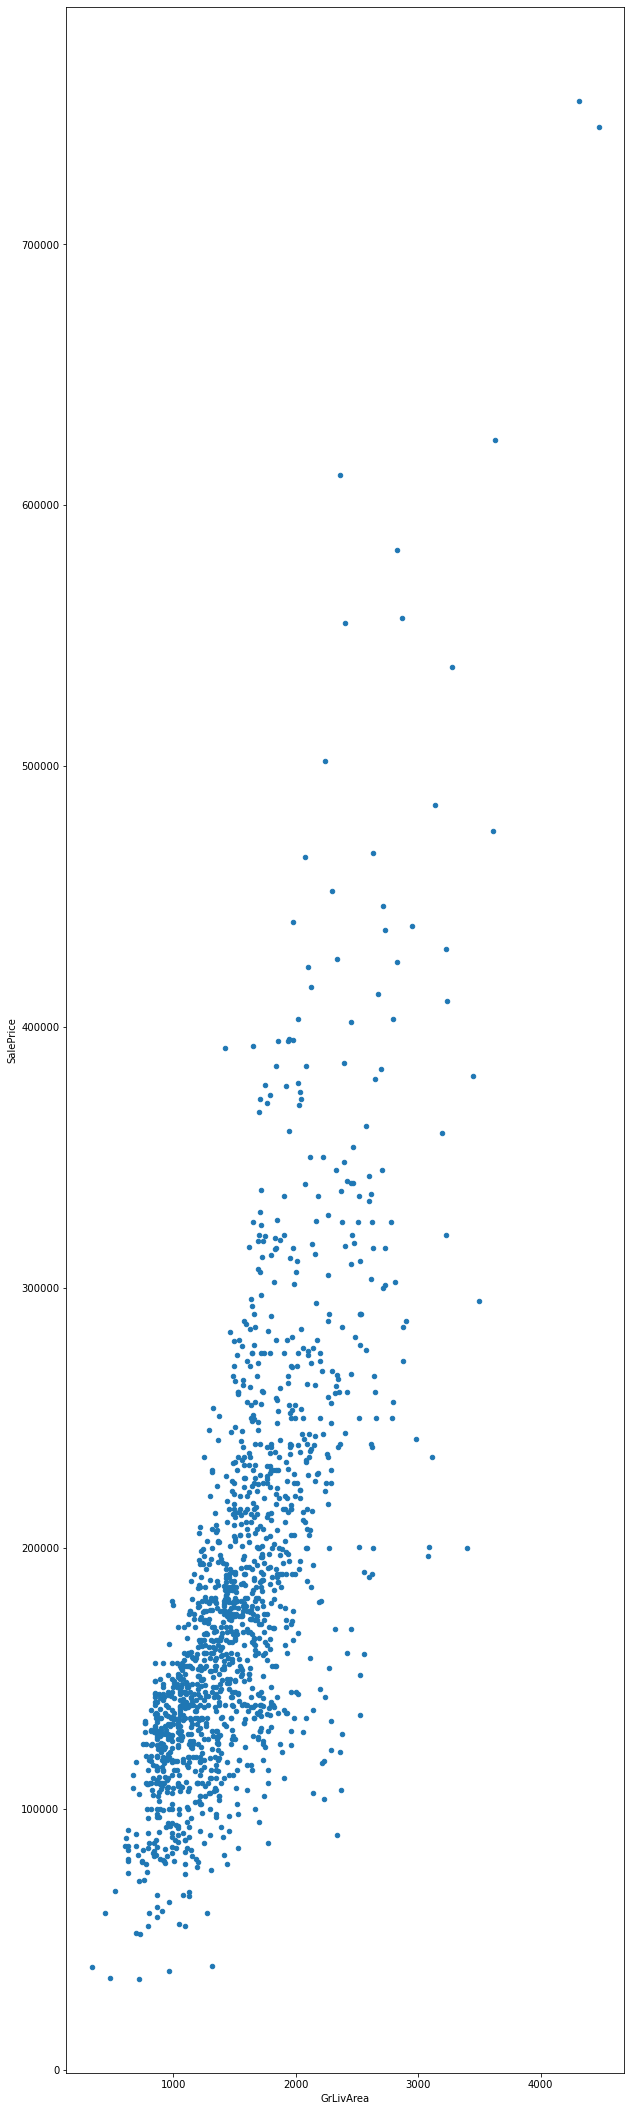

In [236]:
#scatter plot grlivarea/saleprice
grafDisp(data_recat,"GrLivArea","SalePrice")

#### Outliers PoolArea

* Gráfica Inicial

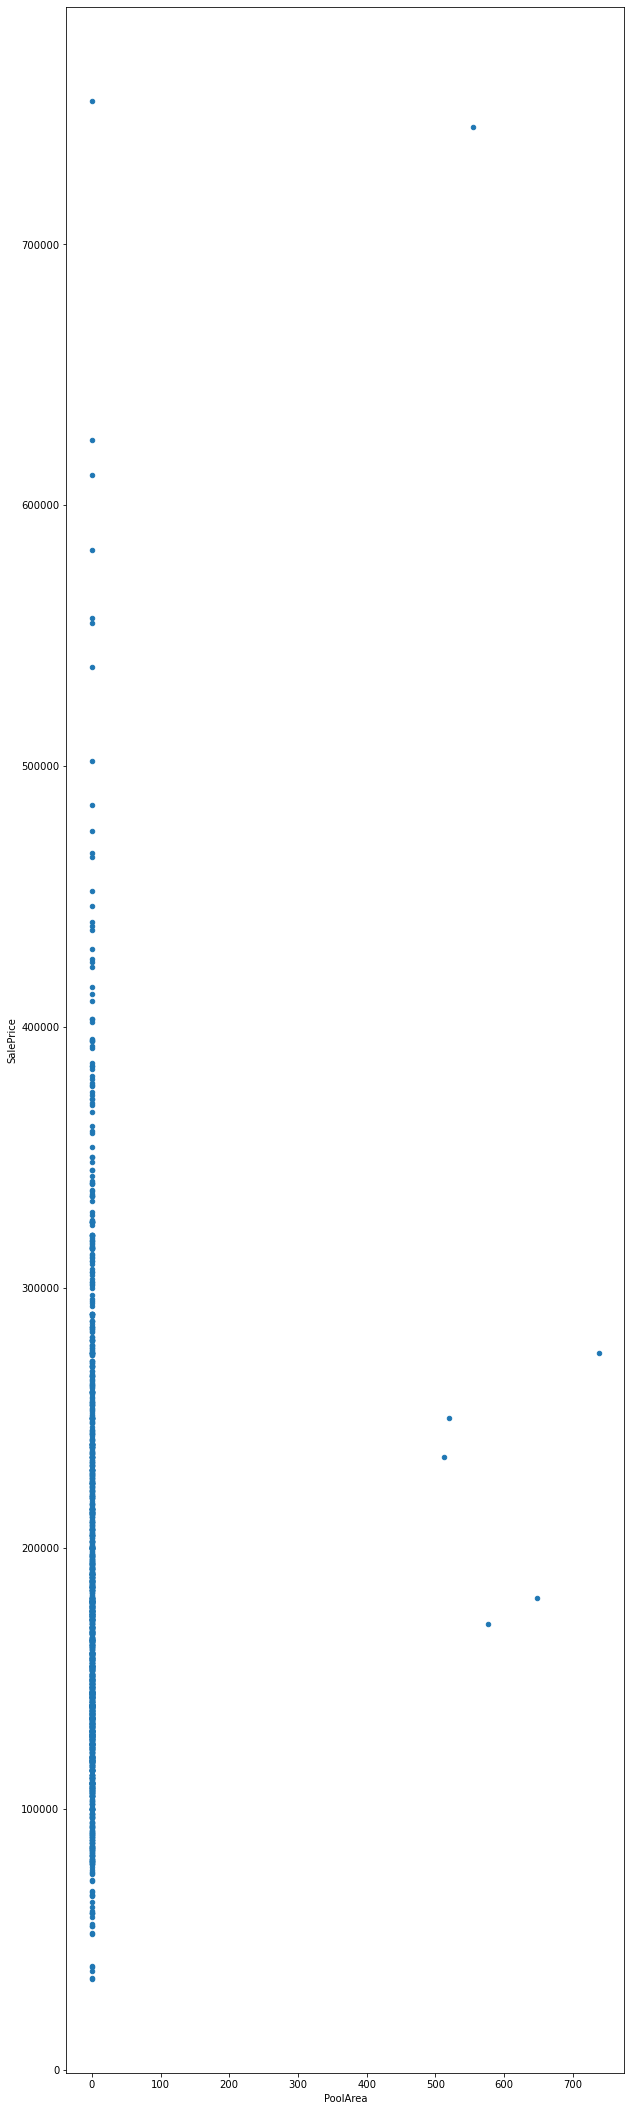

In [237]:
#scatter plot poolarea/saleprice
grafDisp(data_recat,"PoolArea","SalePrice")

* Borrado Outliers

In [238]:
data_recat[data_recat["PoolArea"]>500][["PoolArea","SalePrice"]]

,PoolArea,SalePrice
197,512,235000
810,648,181000
1170,576,171000
1182,555,745000
1386,519,250000
1423,738,274970


In [239]:
borrarFilas(data_recat,'PoolArea',500)

* Gráfica Final

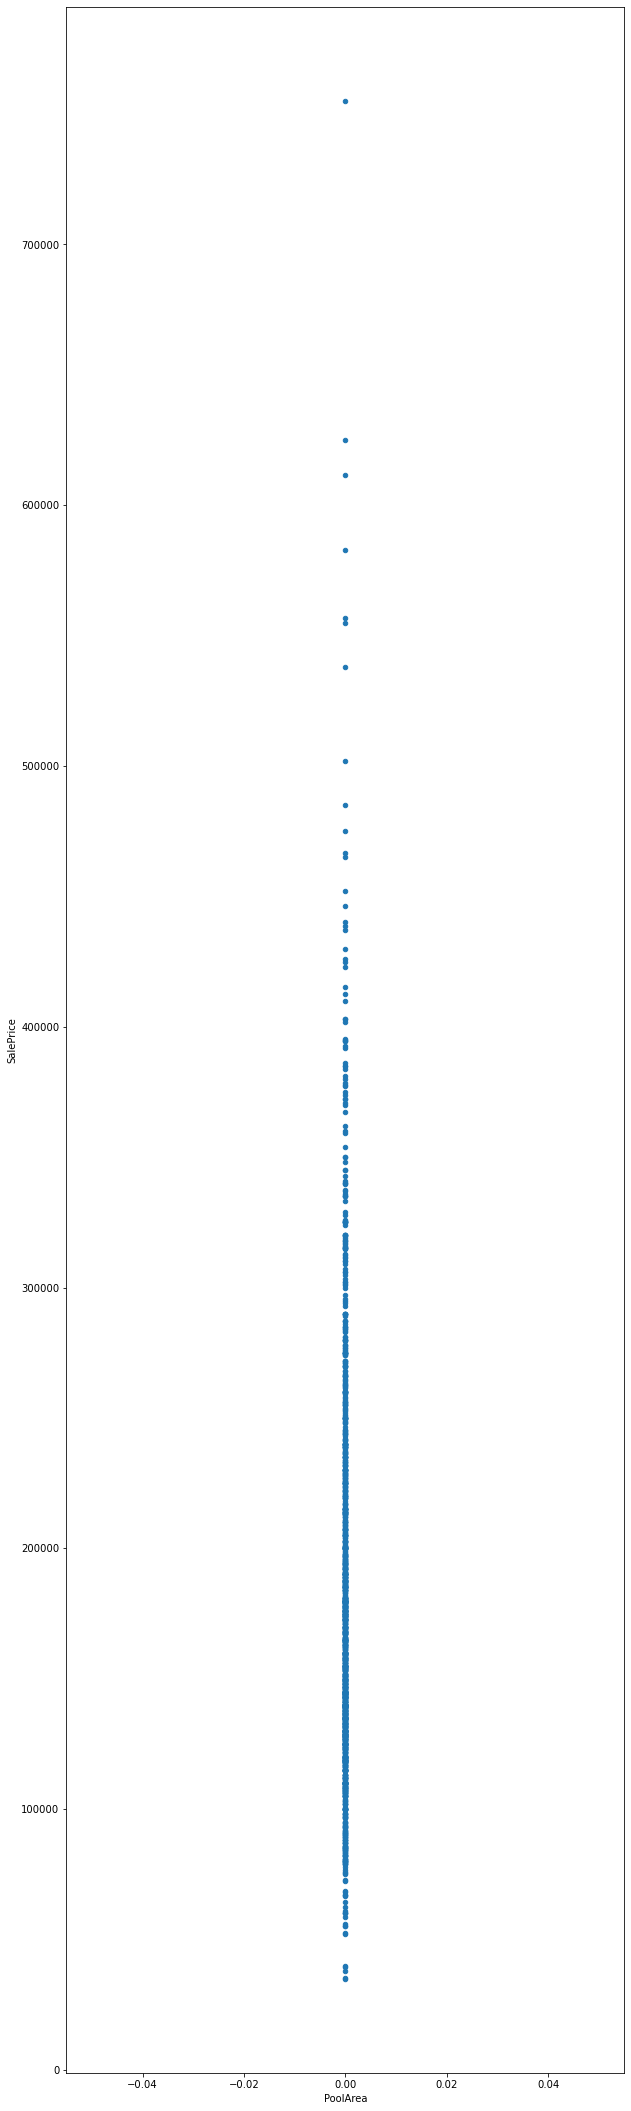

In [240]:
grafDisp(data_recat,"PoolArea","SalePrice")

#### Outliers MiscVal

* Gráfica Inicial

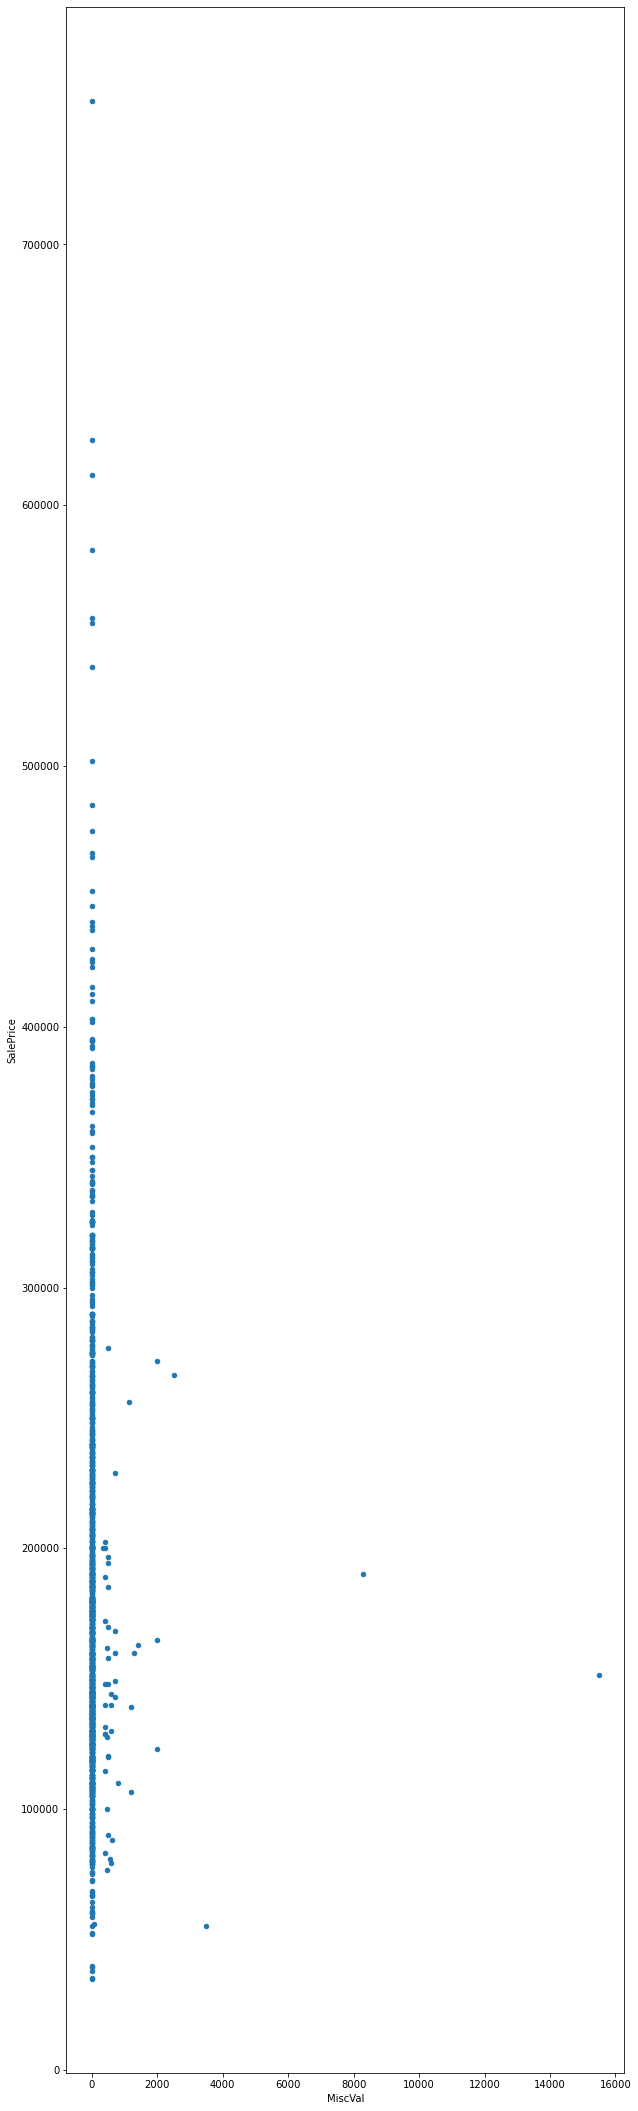

In [241]:
# Grafica miscval/salesprice
grafDisp(data_recat,"MiscVal","SalePrice")

* Borrado de Outliers

In [242]:
data_recat[data_recat["MiscVal"]>8000][["MiscVal","SalePrice"]]

,MiscVal,SalePrice
346,15500,151500
1230,8300,190000


In [243]:
borrarFilas(data_recat,'MiscVal',8000)

* Gráfica Final 

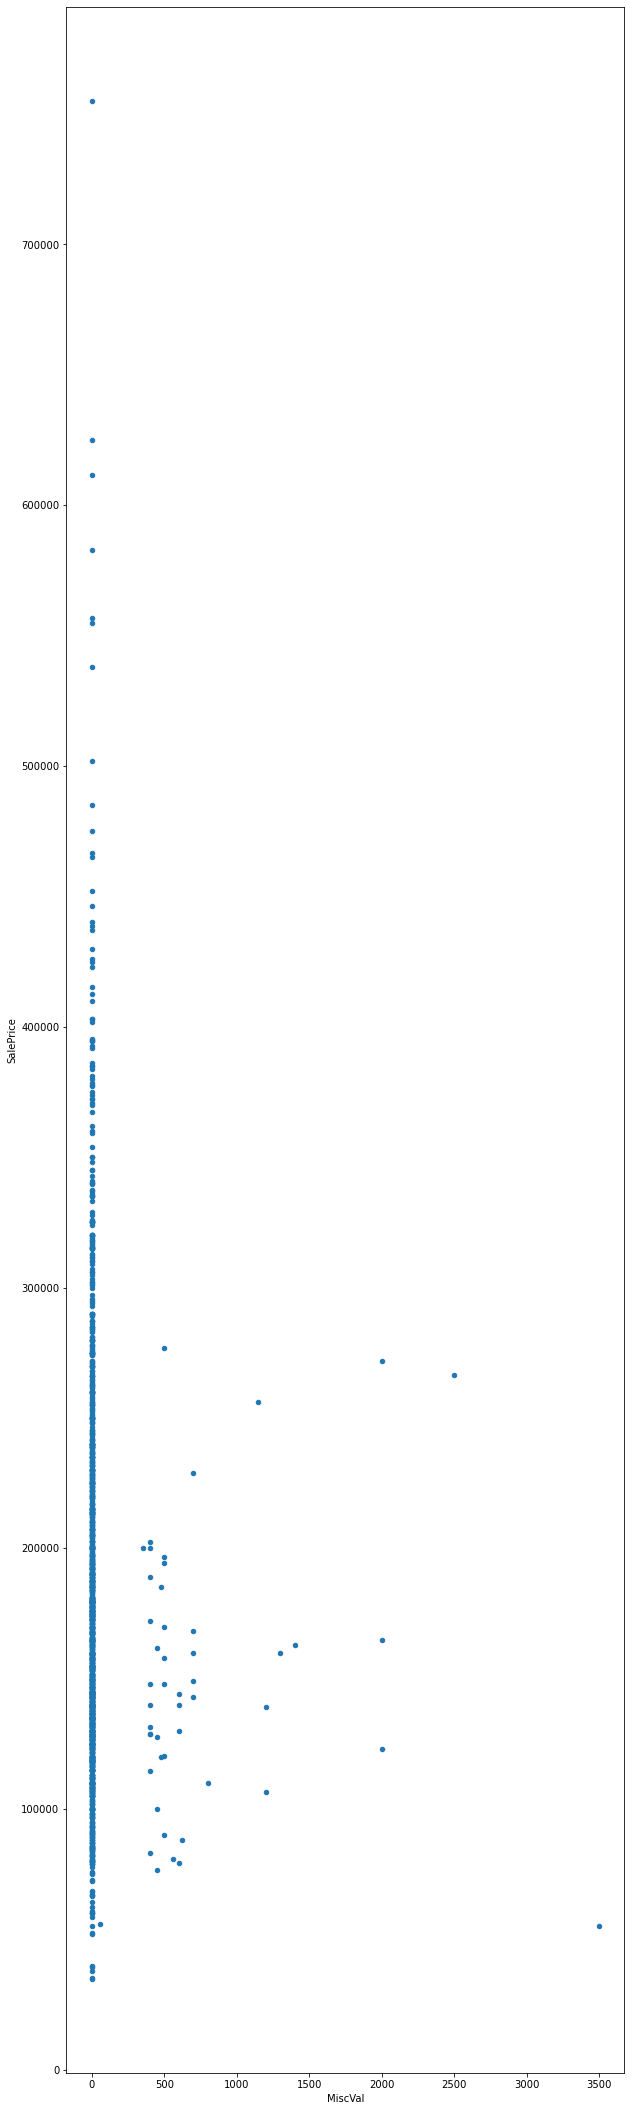

In [244]:
grafDisp(data_recat,"MiscVal","SalePrice")

#### Outliers LotArea

* Gráfica Inicial

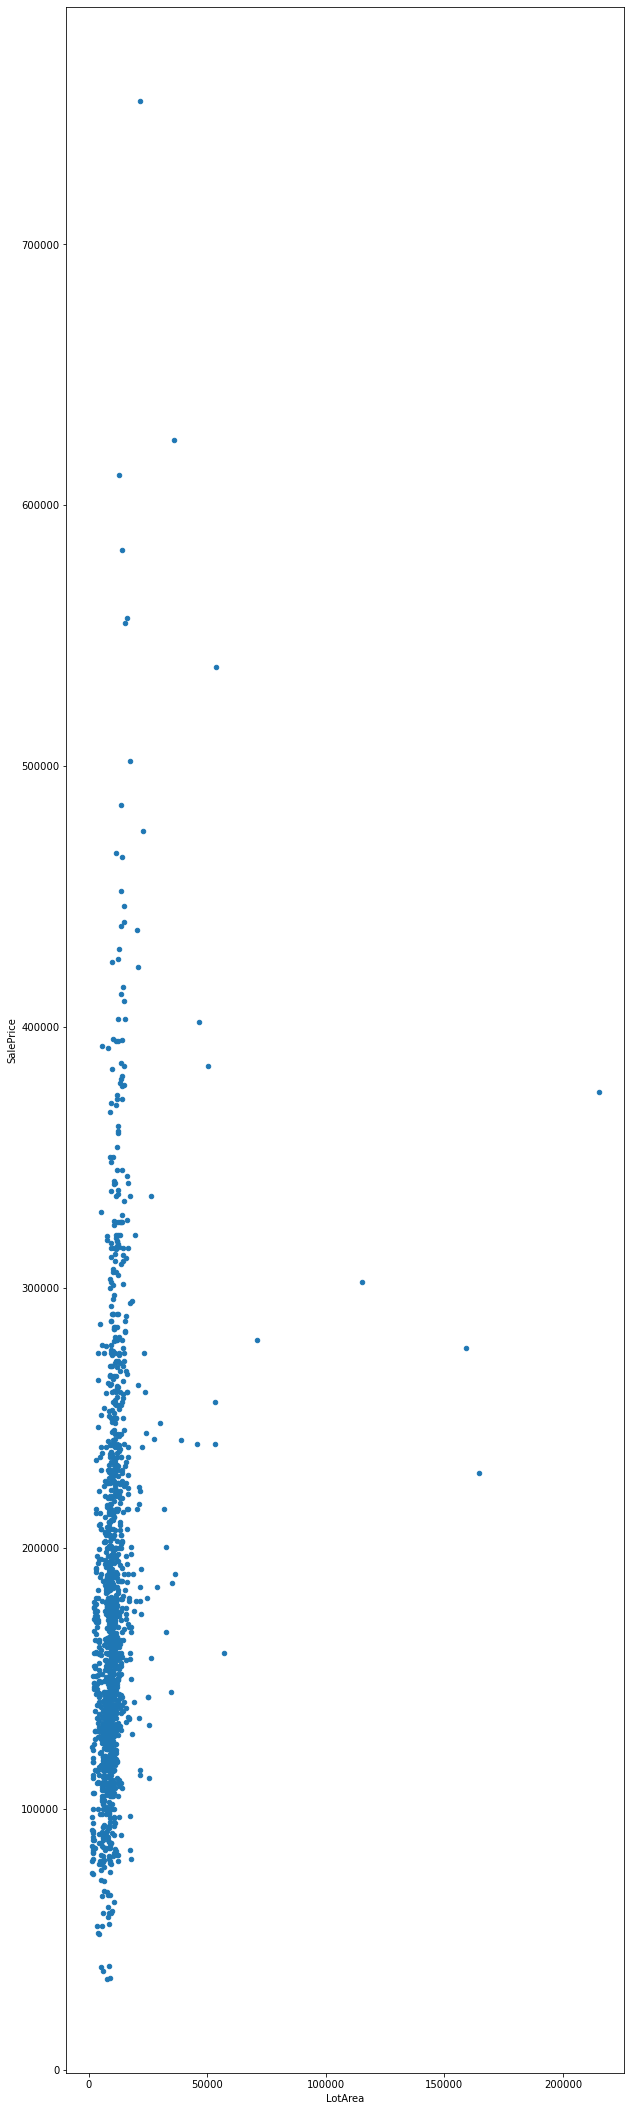

In [245]:
#scatter plot lotarea/saleprice
grafDisp(data_recat,"LotArea","SalePrice")

* Borrado de outliers

In [246]:
data_recat[data_recat["LotArea"]>100000][["LotArea","SalePrice"]]

,LotArea,SalePrice
249,159000,277000
313,215245,375000
335,164660,228950
706,115149,302000


In [247]:
borrarFilas(data_recat,'LotArea',100000)

* Gráfica Final

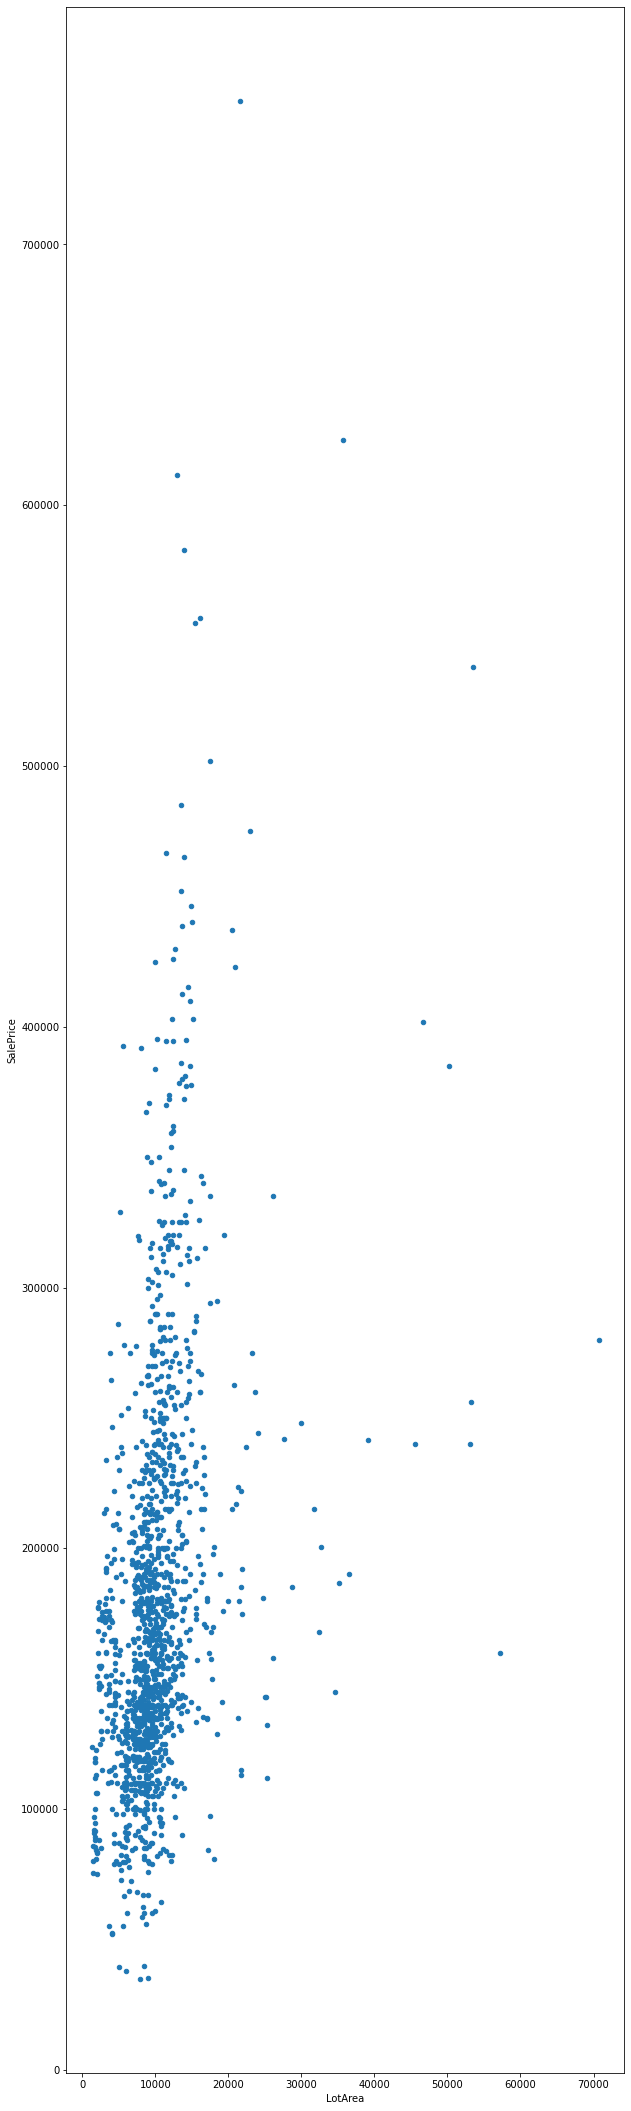

In [248]:
grafDisp(data_recat,"LotArea","SalePrice")

#### Outliers MasVnrArea

* Gráfica Inicial

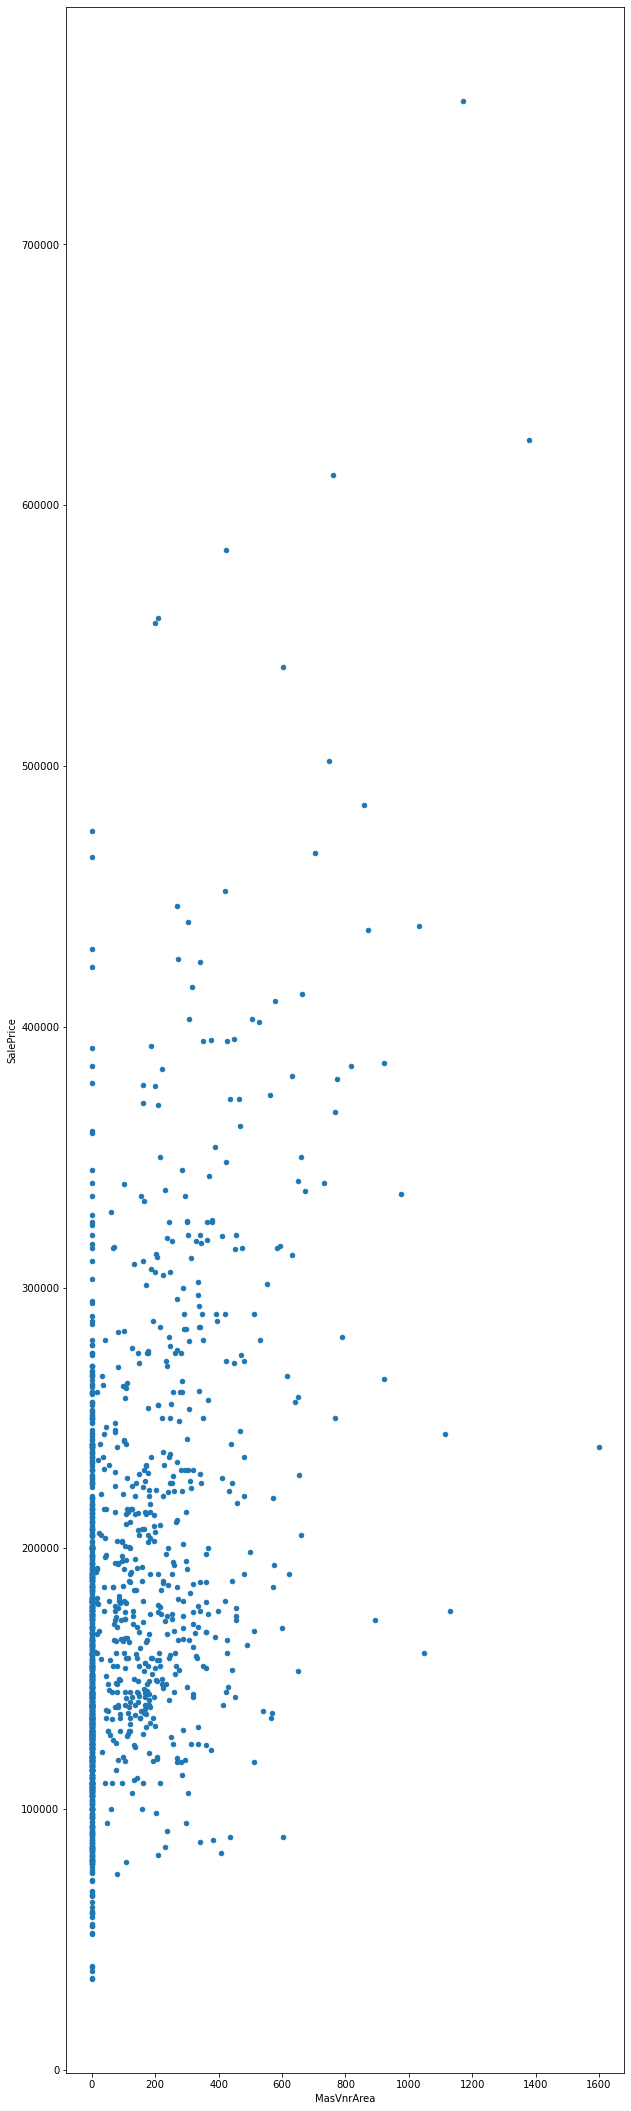

In [249]:
#scatter plot masvnrarea/saleprice
grafDisp(data_recat,"MasVnrArea","SalePrice")

* Borrado Outliers

In [250]:
data_recat[data_recat["MasVnrArea"]>1000][["LotArea","SalePrice"]]

,LotArea,SalePrice
58,13682,438780
70,13651,244000
115,3230,176000
297,7399,239000
691,21535,755000
808,13400,159950
1169,35760,625000


In [251]:
borrarFilas(data_recat,'MasVnrArea',1000)

* Gráfica Final

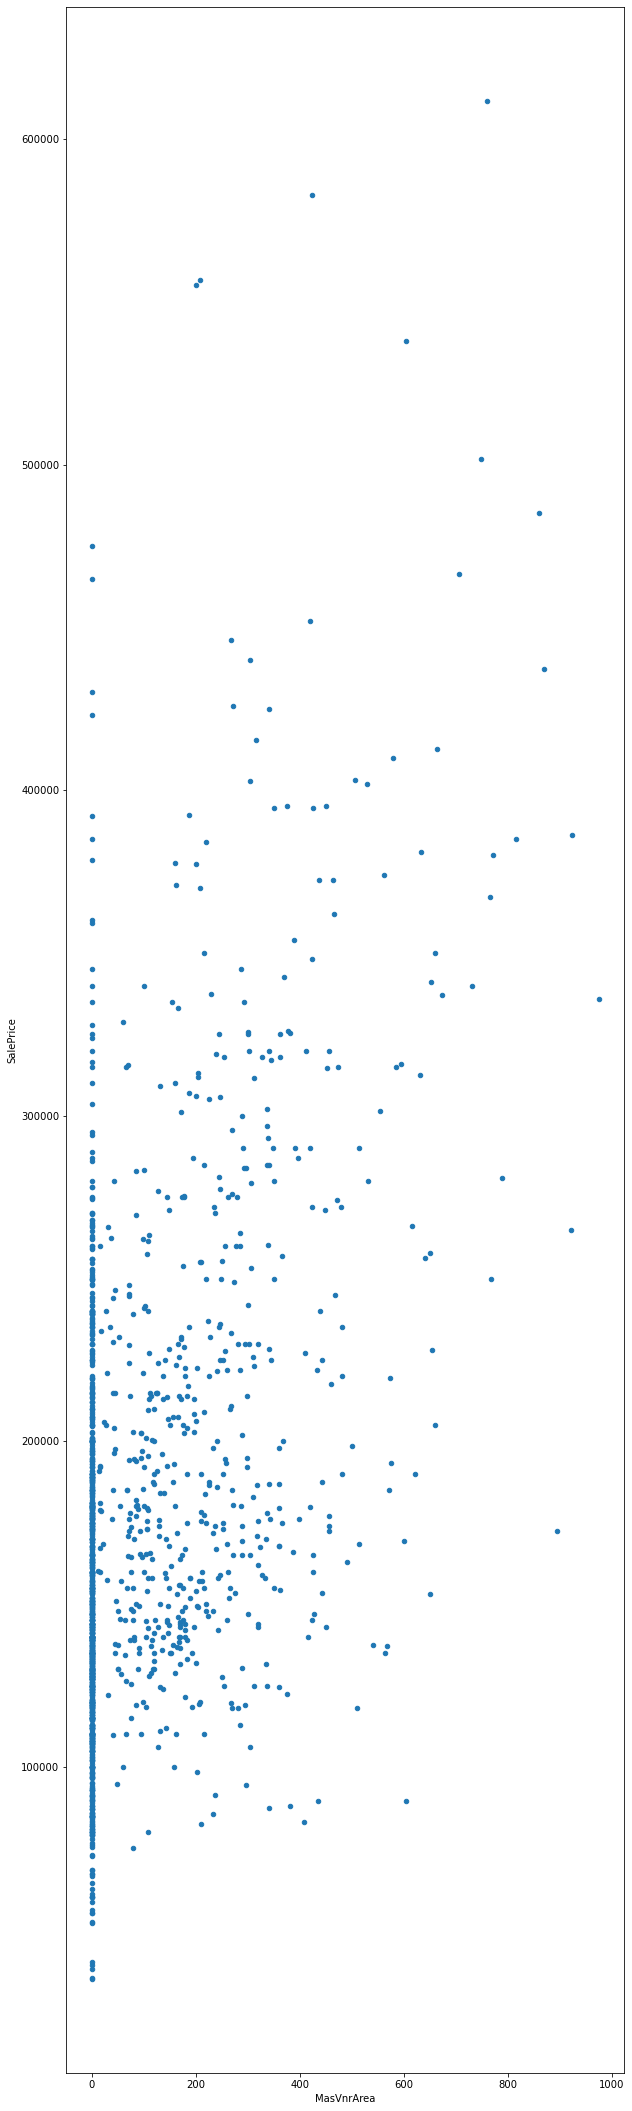

In [252]:
grafDisp(data_recat,"MasVnrArea","SalePrice")

(array([971., 171., 124.,  80.,  43.,  18.,  17.,   7.,   4.,   4.]),
 array([  0. ,  97.5, 195. , 292.5, 390. , 487.5, 585. , 682.5, 780. ,
        877.5, 975. ]),
 <BarContainer object of 10 artists>)

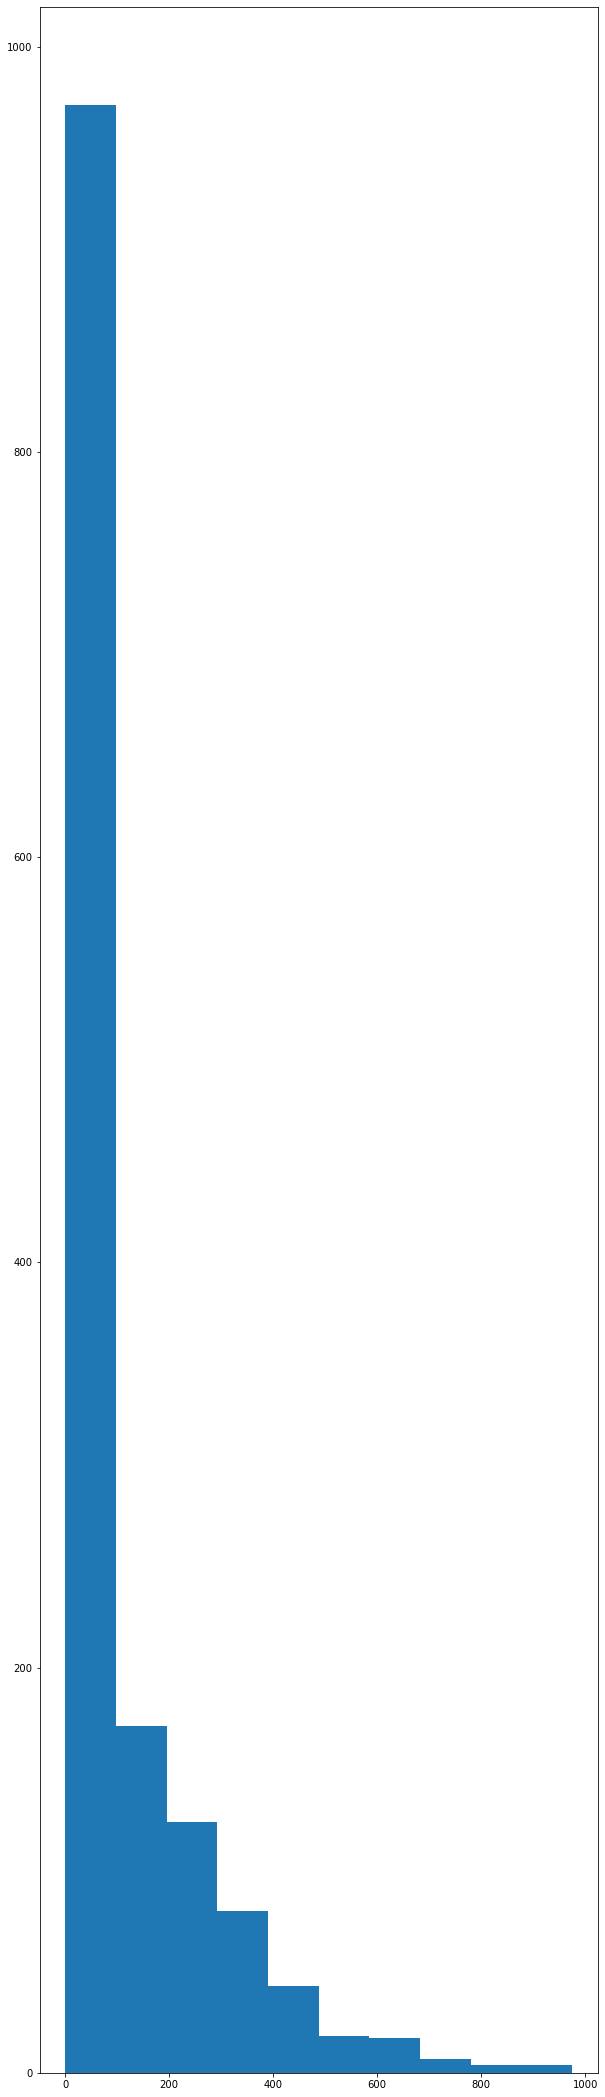

In [253]:
plt.hist(data_recat["MasVnrArea"])

### Derived Data

#### Variables Dummy

In [254]:
v1 =  ['Street']
def dummies(x):
    return x.map({'Pave': 1, "Grvl": 0})
data_recat[v1] = data_recat[v1].apply(dummies)

v2 =  ['Utilities']
def dummies(x):
    return x.map({'AllPub': 1, "NoSeWa": 0})
data_recat[v2] = data_recat[v2].apply(dummies)

v3 =  ['CentralAir']
def dummies(x):
    return x.map({'Y': 1, "N": 0})
data_recat[v3] = data_recat[v3].apply(dummies)

# 5. Análisis de Datos

### Análisis Univariable

In [255]:
numeric_cols = data_recat.select_dtypes(include=['float64', 'int64']).columns
categorical_cols = data_recat.select_dtypes(include=['object']).columns

# Imprimir las columnas
print("Numeric columns: ", numeric_cols)
print("Categorical columns: ", categorical_cols)

Numeric columns:  Index(['Id', 'LotFrontage', 'LotArea', 'Street', 'Utilities', 'OverallQual',
       'OverallCond', 'MasVnrArea', 'CentralAir', 'GrLivArea', 'BedroomAbvGr',
       'KitchenAbvGr', 'GarageCars', 'WoodDeckSF', 'PoolArea', 'MiscVal',
       'MoSold', 'SalePrice', 'TotalSF', 'TotalBathrooms', 'TotaPorchSF',
       'EdadCasa', 'EdadGarage', 'EdadVendido', 'EdadRemod'],
      dtype='object')
Categorical columns:  Index(['MSSubClass', 'MSZoning', 'Alley', 'LotShape', 'LandContour',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'Electrical', 'KitchenQual', 'Functional',
       'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'PavedDrive',
       'Fence', 'MiscFeature', 'SaleType', '

#### Numeric Data

* OverallQual

Mean:  6.081306462821404
Median:  6.0
Mode:  5
Standard deviation:  1.3670794489148352
Range:  9


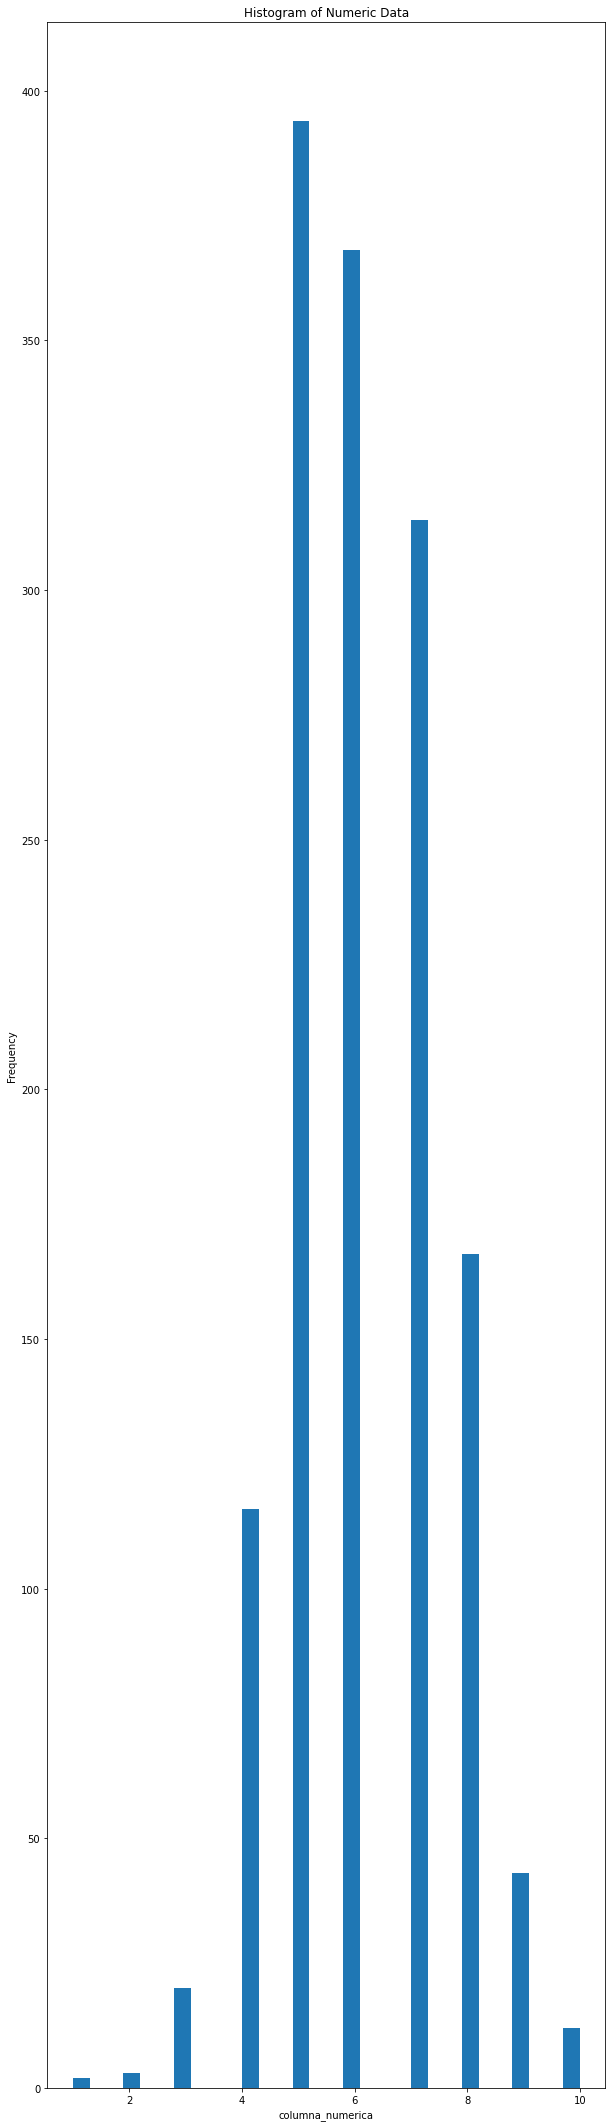

In [257]:
# Seleccionar la columna de interés
col = data_recat['OverallQual']

# Calcular medidas de tendencia central y de dispersión
mean = col.mean()
median = col.median()
mode = col.mode().values[0]
std = col.std()
range = col.max() - col.min()

# Imprimir los resultados
print("Mean: ", mean)
print("Median: ", median)
print("Mode: ", mode)
print("Standard deviation: ", std)
print("Range: ", range)

# Visualizar la distribución de los datos con un histograma
plt.hist(col, bins=30)
plt.xlabel("columna_numerica")
plt.ylabel("Frequency")
plt.title("Histogram of Numeric Data")
plt.show()

#### Categorical Data

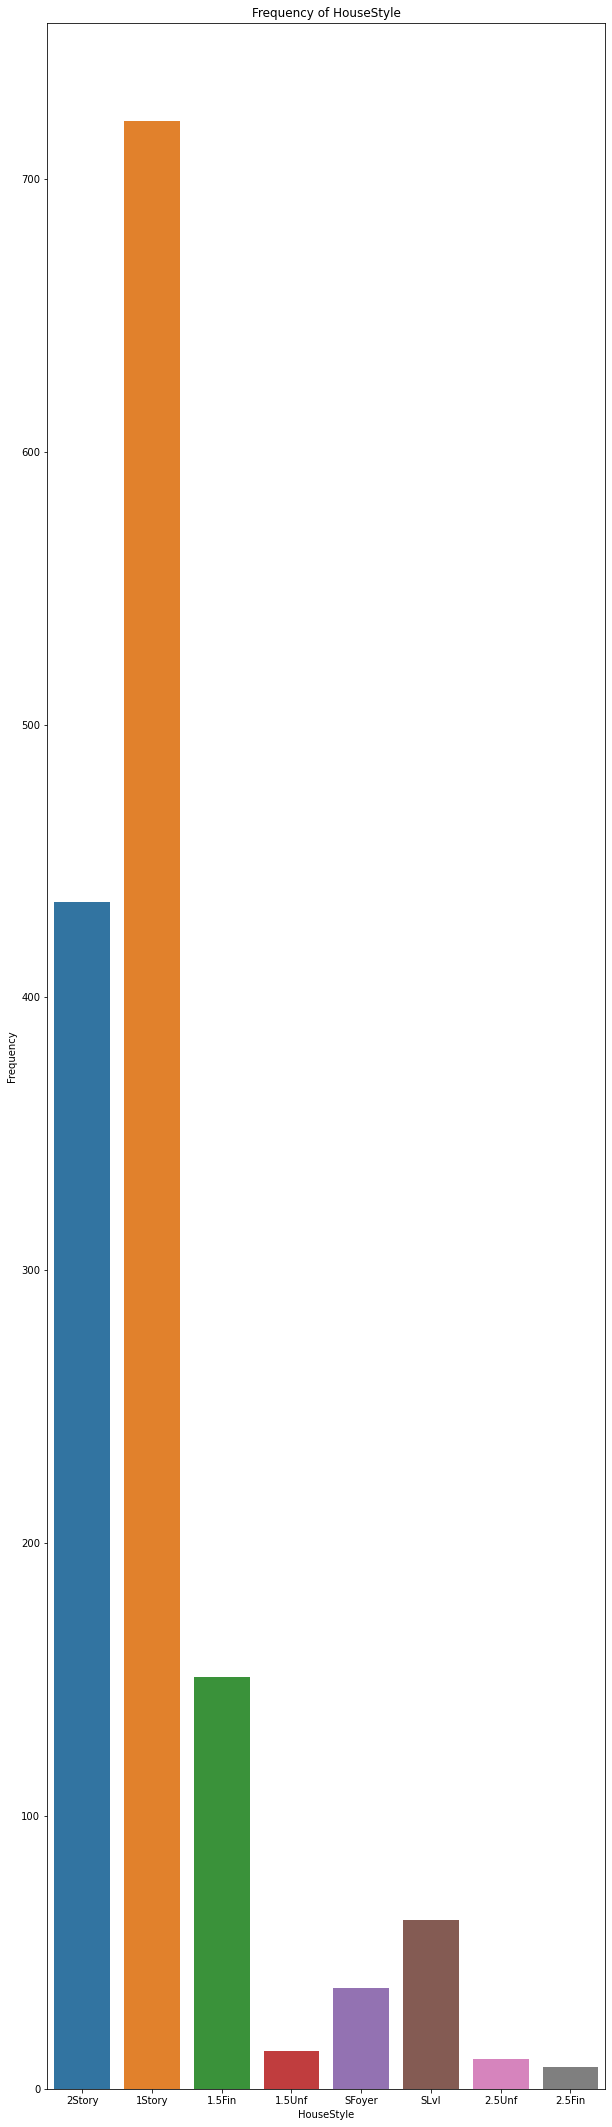

In [259]:
sns.countplot(x='HouseStyle', data=data_recat)

# Agregar título y etiquetas de eje
plt.title('Frequency of HouseStyle')
plt.xlabel('HouseStyle')
plt.ylabel('Frequency')

# Mostrar gráfico
plt.show()

### Análisis Bivariblae

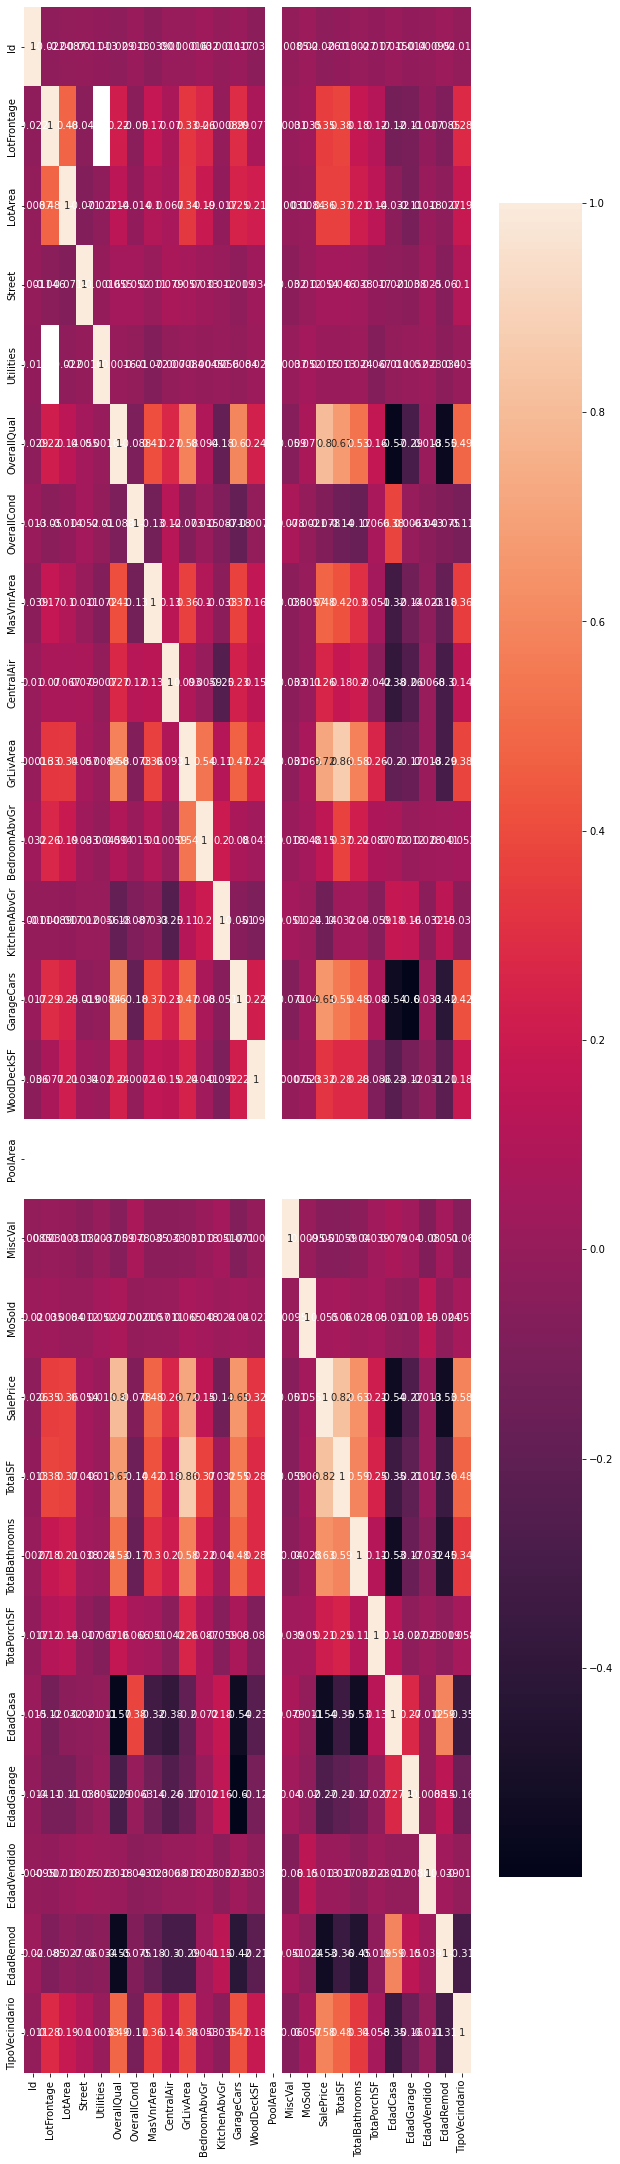

In [260]:
# Análisis de correlación
correlation = data_recat.corr()

# Visualización de los resultados usando un mapa de calor
sns.heatmap(correlation, annot=True)
plt.show()

# 6. Preparación de Datos

### Definición de Datos

In [89]:
#campos_numericos=data_recat.select_dtypes(include=[np.number])
campos_categoricos=data_recat.select_dtypes(include=[np.object])
campos_categoricos.head()
#campos_categoricos.columns

,MSSubClass,MSZoning,Alley,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,...,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,PavedDrive,Fence,MiscFeature,SaleType,SaleCondition
0,60,RL,No,Reg,Lvl,Inside,Gtl,CollgCr,Norm,Norm,...,Typ,No,Attchd,RFn,TA,Y,No,No,WD,Normal
1,20,RL,No,Reg,Lvl,FR2,Gtl,Veenker,Feedr,Norm,...,Typ,TA,Attchd,RFn,TA,Y,No,No,WD,Normal
2,60,RL,No,IR1,Lvl,Inside,Gtl,CollgCr,Norm,Norm,...,Typ,TA,Attchd,RFn,TA,Y,No,No,WD,Normal
3,70,RL,No,IR1,Lvl,Corner,Gtl,Crawfor,Norm,Norm,...,Typ,Gd,Detchd,Unf,TA,Y,No,No,WD,Abnorml
4,60,RL,No,IR1,Lvl,FR2,Gtl,NoRidge,Norm,Norm,...,Typ,TA,Attchd,RFn,TA,Y,No,No,WD,Normal


In [90]:
onehot = pd.get_dummies(campos_categoricos, drop_first=True)
#plt.hist(data_recat["OverallQual"])

In [91]:
onehot.columns

Index(['MSSubClass_160', 'MSSubClass_180', 'MSSubClass_190', 'MSSubClass_20',
       'MSSubClass_30', 'MSSubClass_40', 'MSSubClass_45', 'MSSubClass_50',
       'MSSubClass_60', 'MSSubClass_70',
       ...
       'SaleType_ConLI', 'SaleType_ConLw', 'SaleType_New', 'SaleType_Oth',
       'SaleType_WD', 'SaleCondition_AdjLand', 'SaleCondition_Alloca',
       'SaleCondition_Family', 'SaleCondition_Normal',
       'SaleCondition_Partial'],
      dtype='object', length=222)

In [92]:
dataOK = data_recat.copy()
dataOK = data_recat.drop(list(campos_categoricos.columns), axis=1)

dataOK = pd.concat([dataOK,onehot], axis=1)

In [93]:
dataOK.drop(["Id"],axis=1, inplace=True)
dataOK.shape

(1438, 247)

In [94]:
X = dataOK
y = np.log(X.SalePrice)
#y = X["SalePrice"]
X = X.drop("SalePrice",1)

In [95]:
X.shape

(1438, 246)

In [96]:
from sklearn.preprocessing import StandardScaler
escalador = StandardScaler()
escalador.fit_transform(X)

array([[-0.2341111 , -0.28424959,  0.05906931, ..., -0.11876183,
         0.46538378, -0.30447523],
       [ 0.47923918, -0.06909006,  0.05906931, ..., -0.11876183,
         0.46538378, -0.30447523],
       [-0.09144104,  0.2396171 ,  0.05906931, ..., -0.11876183,
         0.46538378, -0.30447523],
       ...,
       [-0.18655441, -0.17348921,  0.05906931, ..., -0.11876183,
         0.46538378, -0.30447523],
       [-0.09144104, -0.04719992,  0.05906931, ..., -0.11876183,
         0.46538378, -0.30447523],
       [ 0.24145576, -0.00603896,  0.05906931, ..., -0.11876183,
         0.46538378, -0.30447523]])

### Splitting Data into Train Test

In [97]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,train_size=0.8,test_size = 0.2, random_state=34)

In [98]:
X_test.shape

(288, 246)

In [99]:
rf = RandomForestRegressor(n_estimators=100)
rf.fit(X_train, y_train)

RandomForestRegressor()

Text(0.5, 0, 'Random Forest Feature Importance')

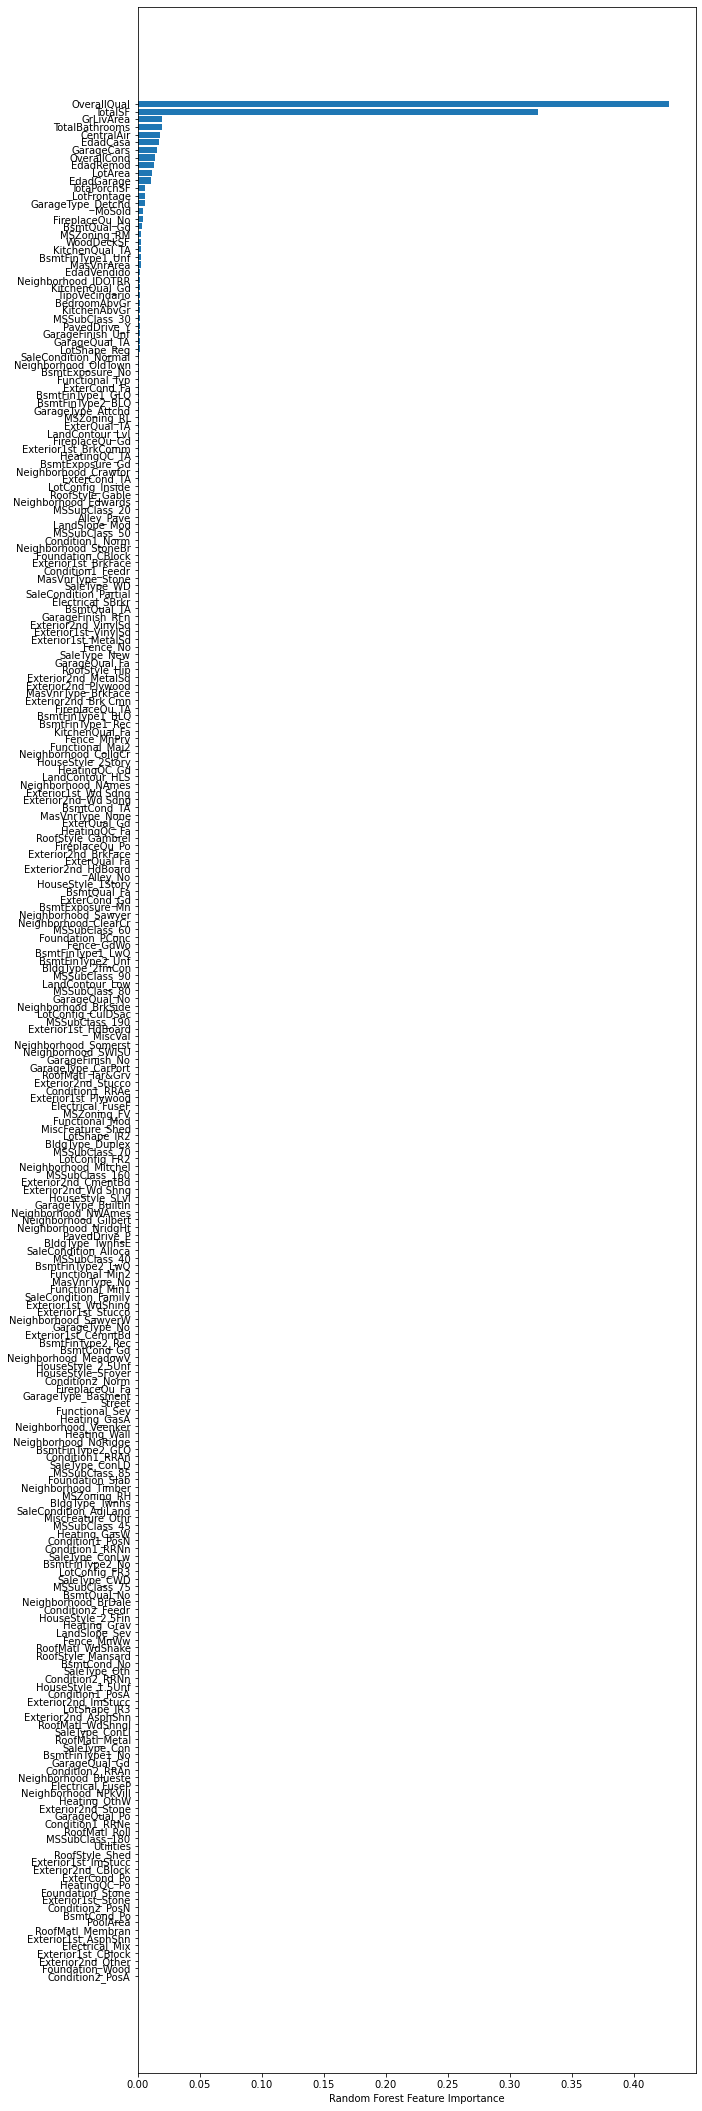

In [100]:
plt.rcParams.update({'figure.figsize': (10, 38)})
plt.rcParams.update({'font.size': 10})
#plt.barh(X.columns, rf.feature_importances_)
sorted_idx = rf.feature_importances_.argsort()
plt.barh(X.columns[sorted_idx], rf.feature_importances_[sorted_idx])
plt.xlabel("Random Forest Feature Importance")

# 7. Construcción del Modelo

### Regresión Lineal

In [175]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [176]:
y_pred_train_lr = lr.predict(X_train)
y_pred_test_lr = lr.predict(X_test)

# metric_lr = []
r2_train_lr = r2_score(y_train, y_pred_train_lr)
print("R2 Train Score: ", r2_train_lr)
# metric_lr.append(r2_train_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train_lr)
print("Mean Squared Train Error Train: ", mse_train_lr)
mse_test_lr = mean_squared_error(y_test, y_pred_test_lr)
print("Mean Squared Train Error Test: ", mse_test_lr)
#metric_lr.append(mse_train_lr**0.5)

R2 Train Score:  0.9519121153301198
Mean Squared Train Error Train:  0.007275644692377993
Mean Squared Train Error Test:  0.018492935505615246


* **Resultado**

    El R2 Train Score de 0.9519 y el Mean Squared Train Error Train de 0.007275 nos indica que el modelo de regresión lineal se ajusta bien a los datos de entrenamiento, sin embargo el Mean Squared train Error Test nos indica que puede existir un sobreajuste, no ajustandose bien el modelo a valores nuevos. 

    En general, los resultados indican que el modelo de regresión lineal se ajusta bien a los datos de entrenamiento, pero es necesario evaluar el rendimiento del modelo con datos nuevos para determinar su generalización.

### Ridge Regression

In [177]:
parametros = {'alpha': [0.0001, 0.001, 0.01, 0.1, 0.3, 0.5, 0.7, 0.9, 1,3,5,7,9,10,20,50,100,500,1000]}

In [178]:
ridge = Ridge()

folds = 5
model_cv = GridSearchCV(estimator = ridge, param_grid = parametros, scoring= 'neg_mean_absolute_error', cv = folds,return_train_score=True,verbose = 1)            
model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 19 candidates, totalling 95 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.1, 0.3, 0.5, 0.7, 0.9,
                                   1, 3, 5, 7, 9, 10, 20, 50, 100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [179]:
print(model_cv.best_params_)
print(model_cv.best_score_)

{'alpha': 10}
-0.07846541551744501


In [180]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results = cv_results[cv_results['param_alpha']<=1000]
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.02,0.02,0.00,0.00,0.00,{'alpha': 0.0001},-0.08,-0.10,-0.09,-0.09,...,-0.09,0.01,17,-0.06,-0.06,-0.06,-0.06,-0.06,-0.06,0.00
1,0.01,0.00,0.01,0.00,0.00,{'alpha': 0.001},-0.08,-0.10,-0.09,-0.09,...,-0.09,0.01,16,-0.06,-0.06,-0.06,-0.06,-0.06,-0.06,0.00
2,0.01,0.00,0.01,0.00,0.01,{'alpha': 0.01},-0.08,-0.10,-0.09,-0.09,...,-0.09,0.01,15,-0.06,-0.06,-0.06,-0.06,-0.06,-0.06,0.00
3,0.01,0.00,0.01,0.00,0.10,{'alpha': 0.1},-0.08,-0.09,-0.09,-0.09,...,-0.08,0.01,14,-0.06,-0.06,-0.06,-0.06,-0.06,-0.06,0.00
4,0.01,0.00,0.00,0.00,0.30,{'alpha': 0.3},-0.08,-0.09,-0.08,-0.09,...,-0.08,0.01,13,-0.06,-0.06,-0.06,-0.06,-0.06,-0.06,0.00
5,0.01,0.00,0.00,0.00,0.50,{'alpha': 0.5},-0.07,-0.09,-0.08,-0.09,...,-0.08,0.01,12,-0.06,-0.06,-0.06,-0.06,-0.06,-0.06,0.00
6,0.01,0.00,0.00,0.00,0.70,{'alpha': 0.7},-0.07,-0.09,-0.08,-0.09,...,-0.08,0.01,11,-0.06,-0.06,-0.06,-0.06,-0.06,-0.06,0.00
7,0.01,0.00,0.00,0.00,0.90,{'alpha': 0.9},-0.07,-0.09,-0.08,-0.08,...,-0.08,0.01,9,-0.06,-0.06,-0.06,-0.06,-0.06,-0.06,0.00
8,0.01,0.00,0.01,0.00,1,{'alpha': 1},-0.07,-0.09,-0.08,-0.08,...,-0.08,0.01,8,-0.06,-0.06,-0.06,-0.06,-0.06,-0.06,0.00
9,0.01,0.00,0.01,0.00,3,{'alpha': 3},-0.07,-0.09,-0.08,-0.08,...,-0.08,0.00,6,-0.07,-0.06,-0.06,-0.06,-0.07,-0.06,0.00


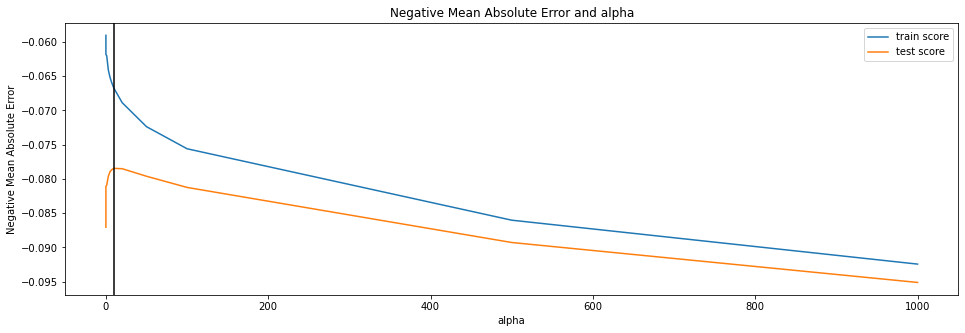

In [181]:
# plotting mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('int32')
plt.figure(figsize=(16,5))

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper right')
#mejor=int(model_cv.best_params_[1])

plt.axvline(x = model_cv.best_params_['alpha'], color = 'black', label = 'best')
plt.show()

In [182]:
alpha = model_cv.best_params_['alpha']
ridge = Ridge(alpha=alpha)

ridge.fit(X_train, y_train)
ridge.coef_

array([ 4.46002004e-04,  5.11363584e-06,  2.30678601e-02,  9.23439548e-03,
        4.66586153e-02,  4.27436924e-02,  3.14484902e-05,  6.26380570e-02,
        1.24522203e-04, -3.78216956e-03, -4.05750978e-02,  3.29402325e-02,
        1.06492313e-04,  0.00000000e+00,  3.30904348e-06, -5.02503497e-04,
        1.21506125e-04,  3.71561317e-02,  1.22067723e-04, -2.06571852e-03,
       -2.18533749e-05,  3.32449040e-03, -9.41277970e-04,  6.08755050e-02,
       -4.09358414e-02, -1.31971417e-02, -3.82092936e-03,  1.10050344e-02,
       -3.10547243e-02, -2.72204278e-03,  6.54941115e-03,  2.52919847e-02,
       -2.00605001e-03,  4.71453858e-02, -9.96838037e-04,  2.01078982e-03,
        4.14483917e-03, -5.95859278e-03,  6.12309483e-02,  3.27787662e-02,
        6.98702097e-02,  4.67933359e-02, -5.04661492e-03, -2.03917580e-03,
        5.34486594e-03,  8.38853917e-04,  3.48768248e-03,  1.34552944e-02,
       -2.06818201e-02, -2.79601785e-03,  2.01575571e-02, -2.04933588e-02,
       -1.20881748e-02, -

In [183]:
y_pred_train_ridge = ridge.predict(X_train)
y_pred_test_ridge = ridge.predict(X_test)

# metric_lr = []
r2_train_ridge = r2_score(y_train, y_pred_train_ridge)
print("R2 Train Score: ", r2_train_ridge)
# metric_lr.append(r2_train_lr)

mse_train_ridge = mean_squared_error(y_train, y_pred_train_ridge)
print("Mean Squared Train Error Train: ", mse_train_ridge)
mse_test_ridge = mean_squared_error(y_test, y_pred_test_ridge)
print("Mean Squared Train Error Test: ", mse_test_ridge)
#metric_lr.append(mse_train_lr**0.5)

R2 Train Score:  0.9401331629301428
Mean Squared Train Error Train:  0.009057787390044689
Mean Squared Train Error Test:  0.013658096599928553


- **Resultado**

    El R2 Train Score de 0,9401 y el Mean Squared Train Error Train de 0,009057 indican que el modelo de Ridge Regression se ajusta bien a los datos de entrenamiento. Los datos se ajustan bien a los datos de entrenamiento.

    El Mean Squared Train Error Test de 0,01365 indica que el modelo Ridge Regression también se ajusta bien a los datos de prueba. El proceso de Ridge Regression puso reducir bien el sobreajuste en comparación con un modelo de regresión lineal sin regularización.

### Lasso Regression

In [184]:
lasso = Lasso()

# cross validation
model_cv = GridSearchCV(estimator = lasso,param_grid = parametros,scoring= 'neg_mean_absolute_error', cv = folds, return_train_score=True, verbose = 1)            

model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 19 candidates, totalling 95 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.1, 0.3, 0.5, 0.7, 0.9,
                                   1, 3, 5, 7, 9, 10, 20, 50, 100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [185]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.10,0.02,0.01,0.00,0.00,{'alpha': 0.0001},-0.07,-0.09,-0.08,-0.08,...,-0.08,0.01,2,-0.06,-0.06,-0.06,-0.06,-0.06,-0.06,0.00
1,0.03,0.00,0.00,0.00,0.00,{'alpha': 0.001},-0.08,-0.08,-0.08,-0.08,...,-0.08,0.00,1,-0.07,-0.07,-0.07,-0.07,-0.07,-0.07,0.00
2,0.02,0.00,0.00,0.00,0.01,{'alpha': 0.01},-0.09,-0.10,-0.09,-0.10,...,-0.09,0.00,3,-0.09,-0.09,-0.09,-0.09,-0.09,-0.09,0.00
3,0.01,0.00,0.00,0.00,0.10,{'alpha': 0.1},-0.11,-0.12,-0.11,-0.12,...,-0.11,0.00,4,-0.11,-0.11,-0.11,-0.11,-0.11,-0.11,0.00
4,0.01,0.00,0.00,0.00,0.30,{'alpha': 0.3},-0.11,-0.12,-0.11,-0.12,...,-0.12,0.00,5,-0.11,-0.11,-0.11,-0.11,-0.11,-0.11,0.00
5,0.01,0.00,0.00,0.00,0.50,{'alpha': 0.5},-0.11,-0.12,-0.11,-0.12,...,-0.12,0.00,6,-0.12,-0.11,-0.11,-0.11,-0.12,-0.11,0.00
6,0.03,0.02,0.01,0.00,0.70,{'alpha': 0.7},-0.12,-0.12,-0.12,-0.12,...,-0.12,0.00,7,-0.12,-0.11,-0.12,-0.11,-0.12,-0.12,0.00
7,0.02,0.00,0.01,0.00,0.90,{'alpha': 0.9},-0.12,-0.12,-0.12,-0.12,...,-0.12,0.00,8,-0.12,-0.12,-0.12,-0.12,-0.12,-0.12,0.00
8,0.01,0.00,0.00,0.00,1,{'alpha': 1},-0.12,-0.13,-0.12,-0.12,...,-0.12,0.00,9,-0.12,-0.12,-0.12,-0.12,-0.12,-0.12,0.00
9,0.01,0.00,0.00,0.00,3,{'alpha': 3},-0.15,-0.15,-0.16,-0.15,...,-0.15,0.00,10,-0.15,-0.15,-0.15,-0.15,-0.15,-0.15,0.00


In [186]:
# Rcuadrado del modelo lasso
model_cv1 = GridSearchCV(estimator = lasso,  param_grid = parametros, scoring= 'r2', cv = folds,  verbose = 1, return_train_score=True)      

# fit the model
model_cv1.fit(X_train, y_train) 

Fitting 5 folds for each of 19 candidates, totalling 95 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.1, 0.3, 0.5, 0.7, 0.9,
                                   1, 3, 5, 7, 9, 10, 20, 50, 100, 500, 1000]},
             return_train_score=True, scoring='r2', verbose=1)

In [187]:
cv_results1 = pd.DataFrame(model_cv1.cv_results_)
cv_results1

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.10,0.03,0.01,0.00,0.00,{'alpha': 0.0001},0.94,0.86,0.92,0.91,...,0.91,0.03,2,0.95,0.96,0.95,0.96,0.95,0.95,0.00
1,0.02,0.00,0.01,0.00,0.00,{'alpha': 0.001},0.94,0.87,0.93,0.91,...,0.91,0.03,1,0.93,0.94,0.93,0.93,0.93,0.93,0.01
2,0.02,0.00,0.01,0.00,0.01,{'alpha': 0.01},0.91,0.81,0.90,0.88,...,0.88,0.03,3,0.88,0.90,0.88,0.89,0.88,0.89,0.01
3,0.01,0.00,0.00,0.00,0.10,{'alpha': 0.1},0.86,0.73,0.85,0.83,...,0.82,0.05,4,0.83,0.85,0.83,0.84,0.83,0.84,0.01
4,0.01,0.00,0.00,0.00,0.30,{'alpha': 0.3},0.86,0.73,0.85,0.84,...,0.82,0.05,5,0.82,0.85,0.83,0.83,0.83,0.83,0.01
5,0.01,0.00,0.00,0.00,0.50,{'alpha': 0.5},0.85,0.73,0.84,0.84,...,0.82,0.05,6,0.82,0.85,0.82,0.83,0.83,0.83,0.01
6,0.02,0.02,0.00,0.00,0.70,{'alpha': 0.7},0.85,0.72,0.84,0.83,...,0.81,0.05,7,0.82,0.84,0.82,0.82,0.82,0.82,0.01
7,0.01,0.00,0.01,0.00,0.90,{'alpha': 0.9},0.84,0.72,0.83,0.83,...,0.81,0.05,8,0.81,0.84,0.81,0.82,0.81,0.82,0.01
8,0.01,0.00,0.00,0.00,1,{'alpha': 1},0.83,0.71,0.83,0.83,...,0.80,0.05,9,0.81,0.83,0.81,0.81,0.81,0.81,0.01
9,0.01,0.00,0.00,0.00,3,{'alpha': 3},0.75,0.61,0.73,0.77,...,0.71,0.06,10,0.72,0.75,0.72,0.72,0.72,0.73,0.01


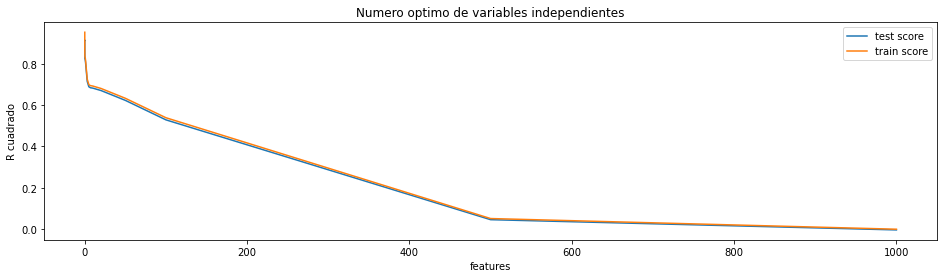

In [188]:
plt.figure(figsize=(16,4))

plt.plot(cv_results1["param_alpha"], cv_results1["mean_test_score"])
plt.plot(cv_results1["param_alpha"], cv_results1["mean_train_score"])
plt.xlabel('features')
plt.ylabel('R cuadrado')
plt.title("Numero optimo de variables independientes")
plt.legend(['test score', 'train score'], loc='upper right')

In [189]:
print(model_cv.best_params_)
print(model_cv.best_score_)

{'alpha': 0.001}
-0.07850649703280731


In [190]:
alpha = 0.0001

lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train, y_train) 

Lasso(alpha=0.0001)

In [191]:
#lets predict the R-squared value of test and train data
y_test_pred = lasso.predict(X_test)
print(metrics.r2_score(y_true=y_test, y_pred=y_test_pred))

0.911138511950464


In [192]:
y_pred_train_lasso = lasso.predict(X_train)
y_pred_test_lasso = lasso.predict(X_test)

r2_train_lasso = r2_score(y_train, y_pred_train_lasso)
print("R2 Train Score: ", r2_train_lasso)

mse_train_lasso = mean_squared_error(y_train, y_pred_train_lasso)
print("Mean Squared Train Error Train: ", mse_train_lasso)
mse_test_lasso = mean_squared_error(y_test, y_pred_test_lasso)
print("Mean Squared Train Error Test: ", mse_test_lasso)

R2 Train Score:  0.9484161589957895
Mean Squared Train Error Train:  0.007804579086628585
Mean Squared Train Error Test:  0.01485908049544448


- **Resultado**

    El R2 Train Score de 0,9484 y el Mean Squared Train Error Train de 0,007805 indican que el modelo de regresión de Lasso se ajusta bien a los datos de entrenamiento. El Mean Square Train Error Test de 0,01486 indica que el modelo de regresión de Lasso también se ajusta bien a los datos de prueba. En general, los resultados del proceso de regresión de Lasso indican que el modelo se ajusta bien a los datos de entrenamiento y prueba, y que la regularización de Lasso ha sido eficaz para reducir el sobreajuste.

# 8. Conclusiones y Observaciones

### Conclusiones:

* El análisis de regresión mostró que existe una relación significativa entre las variables incluidas en el modelo y el precio de la propiedad. El valor del coeficiente de determinación (R^2) de 0.X indica que el X% de la variación en el precio de la propiedad puede explicarse por las variables incluidas en el modelo.

* Los resultados del análisis de regresión sugieren que el número de dormitorios, la tasa de criminalidad y el ingreso medio son determinantes importantes del precio de la propiedad. Es probable que aumentar el número de dormitorios y los niveles de ingresos medios, y reducir la tasa de criminalidad en el área, conduzca a un aumento en el precio de la propiedad.

* En general, los resultados de este análisis de regresión brindan información valiosa para que la empresa tenga en cuenta al tomar decisiones relacionadas con sus propiedades. Al tomar las medidas recomendadas, la empresa puede aumentar potencialmente el valor de mercado de sus propiedades y mejorar su desempeño financiero.

### Recomendaciones

* Con base en los resultados del análisis de regresión, recomendamos que la empresa se concentre en aumentar la cantidad de dormitorios en sus propiedades. Esta variable tiene el efecto positivo más fuerte en el precio de las propiedades, y un aumento de una unidad en el número de dormitorios genera un aumento en el precio de la propiedad de aproximadamente X dólares.

* Adicionalmente, sugerimos que la empresa invierta en mejorar la calidad de sus propiedades en áreas con altos índices de criminalidad. Los resultados de la regresión muestran que la tasa de criminalidad tiene un efecto negativo significativo en el precio de la propiedad, y mejorar la calidad de las propiedades en estas áreas podría conducir a un aumento en su valor de mercado.

* Por último, recomendamos que la empresa considere expandir su negocio a áreas con altos niveles de ingresos medios. Los resultados de la regresión muestran que el ingreso medio tiene un efecto positivo significativo en el precio de la propiedad, y expandirse a estas áreas podría conducir potencialmente a mayores ganancias para la empresa.